# IMA201a - Projet: Étude radiomique utilisant le package Pyradiomics

**Anastasiia Karpova**, **William Liaw**

Travail présenté à *Elsa Angelini*

TÉLÉCOM PARIS
12 novembre 2023

## Résume

Ce rapport présente une étude approfondie sur l'utilisation de la radiomique dans le domaine médical, réalisée dans le cadre de l'activité académique du cours d'Image (IMA201) à Télécom Paris en 2023. En suivant les directives du projet, nous avons exploré le package Pyradiomics [1], analysé les documents [2 - 4], et testé le package avec des images synthétiques et aussi réelles.

Nous avons créé des images synthétiques simples avec des formes sur un fond, en simulant diverses variations de contours, de déplacements d'images et de contrastes. Notre analyse a identifié les paramètres les plus sensibles à chaque source de variabilité.

En approfondissant l'analyse, nous avons sélectionné un sous-ensemble de caractéristiques basées sur la texture et examiné leur sensibilité. En parallèle, nous avons choisi un cas d'étude médicale parmi les propositions fournies, cherchant à reproduire des expériences antérieures ou à explorer de nouveaux domaines d'application.

Les résultats de notre étude ouvrent des perspectives passionnantes pour l'application de la radiomique dans le domaine médical, avec des implications potentielles pour la reproduction d'expériences antérieures, l'exploration de nouveaux cas et l'amélioration des pipelines d'analyse existantes. Ce rapport offre une contribution significative à la compréhension de la radiomique et souligne son potentiel prometteur dans le domaine de l'imagerie médicale.

## Sommaire

1. Introduction
2. Revue de la documentation
3. Test du package Pyradiomics
4. Création d'images synthétiques
5. Analyse approfondie des caractéristiques texturelles
6. Choix d'un cas d'étude médicale
7. Discussion
8. Conclusion
9.  Bibliographie

## Introduction

L'évolution rapide de l'imagerie médicale en analyse clinique représente une avancée significative, caractérisée par des avantages multiples, notamment sa non-invasivité. Cette caractéristique permet d'explorer de manière approfondie l'anatomie interne et de diagnostiquer avec une précision accrue les pathologies, tout en évitant les procédures invasives souvent associées à des risques pour les patients. Parmi les récents développements dans ce domaine, la radiomique se distingue comme une approche révolutionnaire, conférant une dimension complète et automatisée à la quantification des phénotypes radiographiques [1].

La radiomique repose sur l'utilisation d'algorithmes de caractérisation des données pour extraire des informations significatives à partir d'images médicales, particulièrement dans le contexte des soins oncologiques. Cette méthodologie prometteuse offre la possibilité d'une analyse approfondie des caractéristiques radiographiques, ouvrant la voie à une médecine plus automatisée, intégrant l'intelligence artificielle, et à des progrès significatifs en matière de diagnostic et de traitement.

Cependant, malgré les promesses de la radiomique, subsiste un défi majeur lié à l'absence de standardisation dans la collecte et le traitement des caractéristiques des images médicales [2, 4]. L'absence de protocole uniforme pour les méthodes de collecte et d'optimisation de ces caractéristiques peut entraîner des variations significatives des résultats. De plus, la réduction de l'espace dimensionnel, étape cruciale dans le processus de traitement de grandes quantités de données, manque de directives claires, suscitant des interrogations quant à la cohérence et à la reproductibilité des analyses radiomiques.

Un autre aspect crucial à prendre en considération est l'absence de recommandations spécifiques pour le choix des algorithmes de machine learning adaptés au traitement de ces données complexes [3]. Le paysage actuel offre une multitude de méthodes, chacune présentant ses avantages et ses limites, sans qu'il y ait de consensus sur les meilleures pratiques à adopter.

Ainsi, l'évolution remarquable de l'imagerie médicale dans le domaine de l'analyse clinique avec des promesses de la radiomique s'accompagne de lacunes significatives entravant son adoption généralisée. Cette étude vise à contribuer à résoudre ces défis en explorant la robustesse des caractéristiques de texture, contribuant ainsi à relever le défi de la standardisation de la collecte et de l'optimisation des caractéristiques des images.

## Revue de la documentation

Pour faire face aux problématiques rencontrés par la radiomique, Pyradiomics est une bibliothèque Python qui a été conçue. Son objectif principal est de permettre le traitement et l'extraction des caractéristiques radiomiques à partir de données d'imagerie médicale en utilisant des algorithmes de caractéristiques pré-définis, standardisant ainsi une partie du processus de manipulation des caractéristiques radiomiques.

La plateforme Pyradiomics suit la séquence opérationnelle suivante : 1. Chargement et prétraitement de l'image et des cartes de segmentation, 2. Application des filtres activés, 3. Calcul des caractéristiques en utilisant les différentes classes de caractéristiques, et 4. Renvoi des résultats.

### Chargement et prétraitement

Dans cette étape, les images médicales seront chargées dans la plateforme. La grande majorité de la manipulation d'images est effectuée à l'aide de SimpleITK. Pour les caractéristiques de texture et de forme, plusieurs options de rééchantillonnage sont incluses pour garantir des voxels isotropes avec des distances égales entre les voxels voisins dans toutes les directions.

En particulier, les voxels, contraction de "volume élément", représentent l'équivalent tridimensionnel d'un pixel dans l'espace bidimensionnel. En imagerie médicale, avoir des voxels isotropes est particulièrement pertinent car cela permet une représentation plus fidèle de la structure anatomique de l'objet imagé, éliminant ainsi les distorsions potentielles qui pourraient résulter de voxels anisotropes.  L'isotropie des voxels contribue à une interprétation plus précise des données et à une meilleure comparabilité entre différentes acquisitions d'images, ce qui est essentiel dans le domaine médical pour des diagnostics plus fiables et une interprétation cohérente des résultats d'imagerie.

### Filtration

Les caractéristiques peuvent être calculées sur l'image d'origine ou sur des images prétraitées à l'aide d'un choix de plusieurs filtres intégrés. À l'aide de NumPy, la plateforme utilise PyWavelets et SimpleITK pour l'application des filtres ondelettes et LoG, respectivement.


### Calcul des caractéristiques

La plateforme contient cinq classes de caractéristiques: une classe pour les statistiques du premier ordre, une classe pour les descripteurs de forme, et des classes de texture telles que la Matrice de Co-occurrence des Niveaux de Gris (GLCM), la Matrice de Longueur de Course des Niveaux de Gris (GLRM), et la Matrice de Taille de Zone des Niveaux de Gris (GLSZM). Toutes les classes statistiques et de texture peuvent être utilisées pour l'extraction de caractéristiques à partir d'images filtrées et non filtrées. Les descripteurs de forme sont indépendants des valeurs d'intensité et ne peuvent donc être extraits que d'images non filtrées.

Dans les sections suivantes, nous décrivons des classes spécifiques de caractéristiques de Pyradiomics qui seront explorées plus en détail dans l'analyse actuelle.


#### First-order

Les statistiques de premier ordre décrivent la distribution des intensités de voxels dans la région d'image définie par le masque au moyen de métriques de base couramment utilisées. Ces caractéristiques offrent un aperçu fondamental de la distribution des niveaux de gris dans une image médicale. Quelques statistiques du premier ordre utilisées sont:

1. Énergie: La somme des carrés des intensités des pixels, mesurant la puissance globale de l'image.
2. Entropie: Mesure de l'incertitude associée à la distribution des intensités. Une entropie élevée indique une distribution plus complexe.
3. Minimum et Maximum: Les valeurs d'intensité les plus basses et les plus élevées présentes dans l'image.
4. Moyenne: La valeur moyenne des intensités des pixels dans l'image.
5. Écart-type: Mesure de la dispersion des intensités par rapport à la moyenne.
6. Kurtosis: Indique la forme de la distribution des intensités par rapport à une distribution normale. Une kurtosis élevée suggère une concentration importante autour de la moyenne.
7. Skewness: Mesure l'asymétrie de la distribution des intensités. Une skewness positive indique une tendance à avoir des valeurs d'intensité plus élevées que la moyenne.

#### GLCM

Les caractéristiques basées sur la Matrice de Co-occurrence des Niveaux de Gris (GLCM) sont des mesures qui capturent les relations spatiales entre les niveaux de gris des pixels dans une image. La GLCM est une matrice qui compte le nombre d'occurrences de différentes paires de niveaux de gris à des positions relatives spécifiques dans l'image. Quelques caractéristiques extraites de la GLCM sont:

1. Autocorrélation: Mesure de l'ampleur de la finesse et de la grossièreté de la texture.
2. Contraste: Mesure de la variation des intensités entre les pixels voisins. Un contraste élevé indique une forte variation des niveaux de gris.
3. Différence inverse: Mesure de la proximité des intensités des pixels dans l'image. Une homogénéité élevée suggère que les niveaux de gris sont similaires.
4. Contraste de différence inverse: Mesure de la magnitude des variations locales des niveaux de gris.


#### GLDM

Les caractéristiques basées sur la Matrice de Dépendance des Niveaux de Gris (GLDM) capturent les relations de dépendance entre les niveaux de gris des pixels dans une image. La GLDM mesure la fréquence à laquelle un certain nombre de pixels avec des valeurs de gris spécifiques apparaissent dans des positions spécifiques par rapport à un pixel de référence. Quelques caractéristiques extraites de la GLDM sont:

1. Small Dependence Emphasis (SDE): Une mesure de la distribution des petites dépendances, une valeur plus élevée indiquant une plus petite dépendance et des textures moins homogènes.
2. Large Dependence Emphasis (LDE): Une mesure de la distribution des grandes dépendances, une valeur plus élevée indiquant une plus grande dépendance et des textures plus homogènes.



#### GLRLM

Les caractéristiques GLRLM, ou caractéristiques de la Matrice de Longueur de Course des Niveaux de Gris, sont des mesures utilisées dans l'analyse radiomique pour décrire la répartition des longueurs de course des niveaux de gris dans une image médicale. La Matrice de Longueur de Course est une représentation statistique des longueurs de course de paires de niveaux de gris dans une image. Voici quelques caractéristiques GLRLM couramment extraites:

1. Non-uniformité du niveau de gris: Mesure la similarité des valeurs d'intensité du niveau de gris dans l'image, où une valeur GLN inférieure est en corrélation avec une plus grande similarité des valeurs d'intensité.
2. Nombre de Courses Courts et Bas (Short Run Low Gray Level Emphasis): Mesure de la distribution des courses courtes avec des niveaux de gris bas.
3. Nombre de Courses Courts et Hauts (Short Run High Gray Level Emphasis): Mesure de la distribution des courses courtes avec des niveaux de gris élevés.


#### GLSZM

Les caractéristiques GLSZM, ou caractéristiques de la Matrice de Taille de Zone des Niveaux de Gris, sont utilisées en analyse radiomique pour décrire la distribution des tailles de zones homogènes dans une image médicale. La Matrice de Taille de Zone est une représentation statistique qui mesure la fréquence à laquelle différentes tailles de zones homogènes, caractérisées par des niveaux de gris spécifiques, apparaissent dans une image. Voici quelques caractéristiques GLSZM couramment extraites :

1. Zone de Taille Haute Emphase des Niveaux de Gris (High Gray Level Zone Emphasis) : Mesure de la distribution des zones homogènes avec des niveaux de gris élevés.
2. Zone de Taille Basse Emphase des Niveaux de Gris (Low Gray Level Zone Emphasis) : Mesure de la distribution des zones homogènes avec des niveaux de gris bas.

#### NGTDM

Les caractéristiques NGTDM, ou caractéristiques de la Matrice de Gradient de Texture Normalisée, sont utilisées en analyse radiomique pour quantifier les variations de texture dans une image médicale en fonction des gradients de niveaux de gris. La Matrice de Gradient de Texture Normalisée mesure la fréquence à laquelle différentes valeurs de gradients apparaissent dans l'image. Voici quelques caractéristiques NGTDM couramment extraites :

1. Coarseness: Mesure de la rugosité ou de la grossièreté de la texture. Une coarseness élevée indique une texture plus rugueuse.
2. Contrast: Mesure de la variation des gradients dans l'image. Un contraste élevé indique une forte variation des niveaux de gris.
3. Busyness: Mesure de la complexité ou de l'activité de la texture. Une busyness élevée indique une texture plus complexe.
4. Complexity: Mesure de la complexité de la texture basée sur la répartition des gradients dans l'image.
5. Strength: Mesure de la force moyenne des gradients dans l'image.

### Résultats

Les caractéristiques calculées sont stockées et renvoyées dans un dictionnaire ordonné. Chaque caractéristique est identifiée par un nom unique composé du filtre appliqué, de la classe de caractéristiques et du nom de la caractéristique. Outre les caractéristiques calculées, ce dictionnaire contient également des informations supplémentaires sur l'extraction, notamment la version actuelle, les filtres appliqués, les paramètres et l'espacement d'origine de l'image.

## Test du package Pyradiomics

Pour tester la bibliothèque Pyradiomics, nous avons d'abord créé des images synthétiques (disponibles sur l'annuaire `synthetiques`) pour extraire plusieurs fois le même ensemble de fonctionnalités, puis comparé quelles fonctionnalités variaient le plus et le moins.

### Importations

In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import six
from radiomics import featureextractor, getFeatureClasses
from radiomics.imageoperations import getMask
from skimage import io as skio

In [2]:
%matplotlib inline


### Hyperparamètres

In [3]:
PATH_SYNTHETIQUES = os.path.join(os.getcwd(), "images", "synthetiques")
PATH_RESULTS_SYNTHETIQUES = os.path.join(os.getcwd(), "results", "results_synthetiques")

In [4]:
np.random.seed(0)

In [5]:
carreName = "carre-nb"
carrePath = os.path.join(PATH_SYNTHETIQUES, carreName + ".tif")
carreArray = skio.imread(carrePath, plugin="matplotlib", format="tif")[:, :, 0] / 255
carre = sitk.GetImageFromArray(carreArray)
carreMask = getMask(carre)

### Déclarations de fonctions

In [6]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(
            obj,
            (
                np.int_,
                np.intc,
                np.intp,
                np.int8,
                np.int16,
                np.int32,
                np.int64,
                np.uint8,
                np.uint16,
                np.uint32,
                np.uint64,
            ),
        ):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32, np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

### Extraction de caractéristiques

In [ ]:
if not os.path.exists(PATH_RESULTS_SYNTHETIQUES):
    os.makedirs(PATH_RESULTS_SYNTHETIQUES)

extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()

for file in os.listdir(PATH_SYNTHETIQUES):
    filename = os.fsdecode(file)
    imageName = filename[:-4]
    if filename.endswith(".tif"):
        print("\n", imageName, "\n")

        imagePath = os.path.join(PATH_SYNTHETIQUES, imageName + ".tif")
        imageArray = (
            skio.imread(imagePath, plugin="matplotlib", format="tif")[:, :, 0] / 255
        )
        image = sitk.GetImageFromArray(imageArray)

        result = extractor.execute(image, carreMask)

        feature = np.array([])

        for key, value in six.iteritems(result):
            if key.startswith("original_"):
                feature = np.append(feature, result[key])

        operation = json.dumps(result, cls=NumpyEncoder)

        with open(
            os.path.join(PATH_RESULTS_SYNTHETIQUES, imageName + "_results.json"), "w"
        ) as f:
            f.write(operation)

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        axs[0].imshow(imageArray, cmap="gray")
        axs[0].set_title(imageName)
        axs[0].axis("off")

        axs[1].imshow(sitk.GetArrayFromImage(carreMask), cmap="gray")
        axs[1].set_title("carre-nb Mask")
        axs[1].axis("off")

        plt.savefig(os.path.join(PATH_RESULTS_SYNTHETIQUES, imageName + "_imMask.png"))
        plt.close(fig)

        fig = plt.figure(figsize=(10, 5))

        plt.stem(feature)
        plt.yscale("log")
        plt.title("Features from " + imageName)

        plt.savefig(os.path.join(PATH_RESULTS_SYNTHETIQUES, imageName + "_results.png"))

        plt.close(fig)

### Comparaison des résultats

#### Chargement des résultats

In [8]:
results = []
filenames = []

for file in os.listdir(PATH_RESULTS_SYNTHETIQUES):
    filename = os.fsdecode(file)
    if filename.endswith("_results.json"):
        filenames.append(filename[:-13])
        f = open(os.path.join(PATH_RESULTS_SYNTHETIQUES, filename))
        result = json.load(f)
        results.append(result)

featuresSet = []
keysSet = []

for result in results:
    features = np.array([])
    keys = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            features = np.append(features, result[key])
            keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Blur

In [9]:
ind = 0

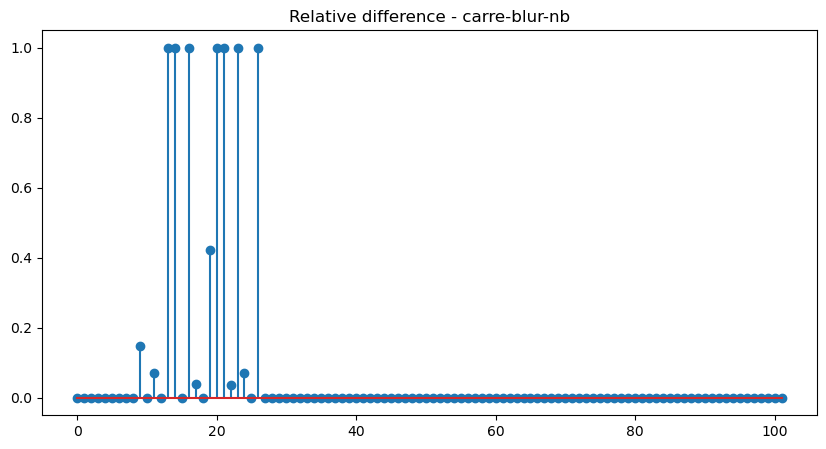

In [10]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresSet[5]),
            np.zeros_like(featuresSet[5]),
        ),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()

In [11]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)) :]], sep="\n")

original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_10Percentile
original_firstorder_Minimum
original_firstorder_InterquartileRange
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_Skewness
original_firstorder_Variance
original_firstorder_Kurtosis


#### BN

In [12]:
ind = 1

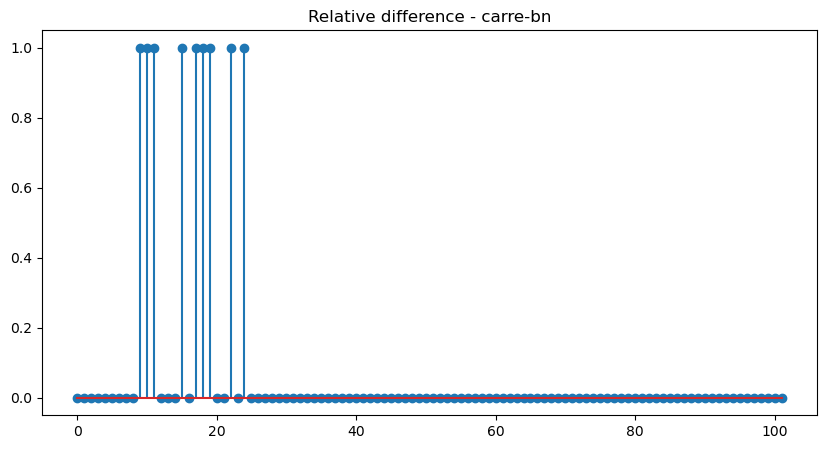

In [13]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresSet[5]),
            np.zeros_like(featuresSet[5]),
        ),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()

In [14]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)) :]], sep="\n")

original_firstorder_Mean
original_firstorder_Median
original_firstorder_Energy
original_firstorder_90Percentile
original_firstorder_10Percentile
original_firstorder_Minimum
original_firstorder_RootMeanSquared
original_firstorder_Maximum
original_firstorder_TotalEnergy


#### Dent

In [15]:
ind = 2

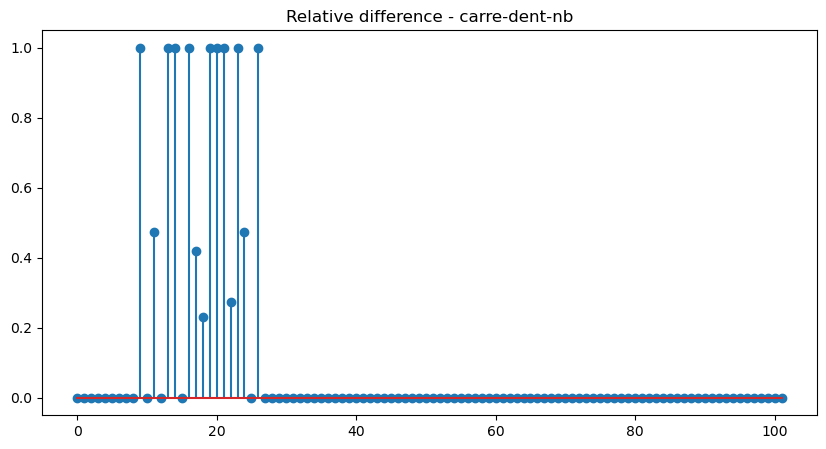

In [16]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresSet[5]),
            np.zeros_like(featuresSet[5]),
        ),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()

In [17]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)) :]], sep="\n")

original_firstorder_Median
original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_Energy
original_firstorder_TotalEnergy
original_firstorder_10Percentile
original_firstorder_Skewness
original_firstorder_Range
original_firstorder_InterquartileRange
original_firstorder_Variance
original_firstorder_Kurtosis
original_firstorder_Minimum
original_firstorder_MeanAbsoluteDeviation
original_firstorder_RobustMeanAbsoluteDeviation


#### Frost

In [18]:
ind = 3

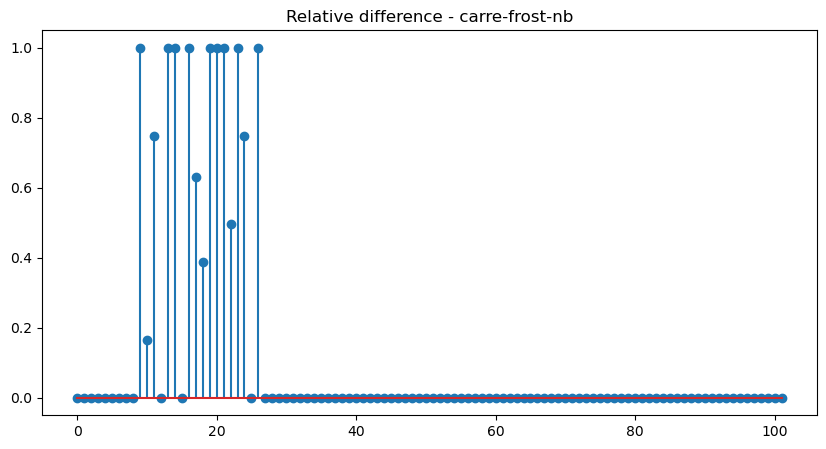

In [19]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresSet[5]),
            np.zeros_like(featuresSet[5]),
        ),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()

In [20]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)) :]], sep="\n")

original_firstorder_90Percentile
original_firstorder_Median
original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_Skewness
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_InterquartileRange
original_firstorder_Variance
original_firstorder_Kurtosis
original_firstorder_Range
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Minimum
original_firstorder_10Percentile


#### Grad

In [21]:
ind = 4

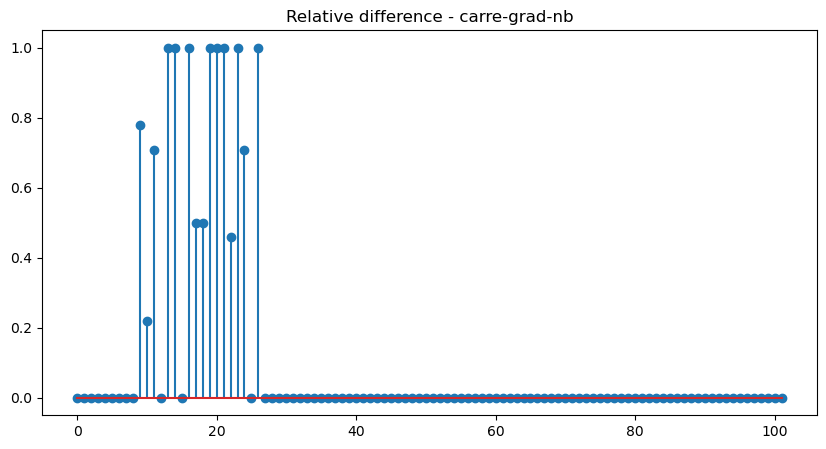

In [22]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresSet[5]),
            np.zeros_like(featuresSet[5]),
        ),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()

In [23]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)) :]], sep="\n")

original_firstorder_90Percentile
original_firstorder_RootMeanSquared
original_firstorder_Median
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_10Percentile
original_firstorder_Skewness
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_InterquartileRange
original_firstorder_Variance
original_firstorder_Kurtosis
original_firstorder_Range
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Minimum


#### NG

In [24]:
ind = 6

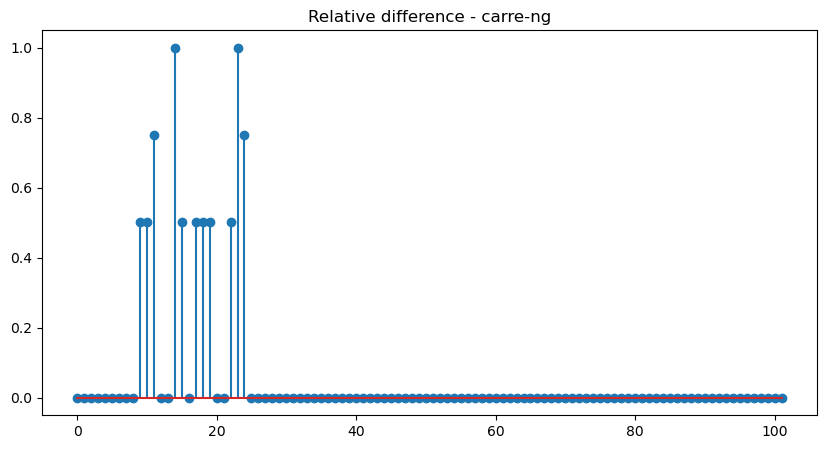

In [25]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresSet[5]),
            np.zeros_like(featuresSet[5]),
        ),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()

In [26]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)) :]], sep="\n")

original_firstorder_Mean
original_firstorder_Minimum
original_firstorder_Maximum
original_firstorder_RootMeanSquared
original_firstorder_90Percentile
original_firstorder_10Percentile
original_firstorder_Median
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_Skewness
original_firstorder_Kurtosis


#### Noise

In [27]:
ind = 7

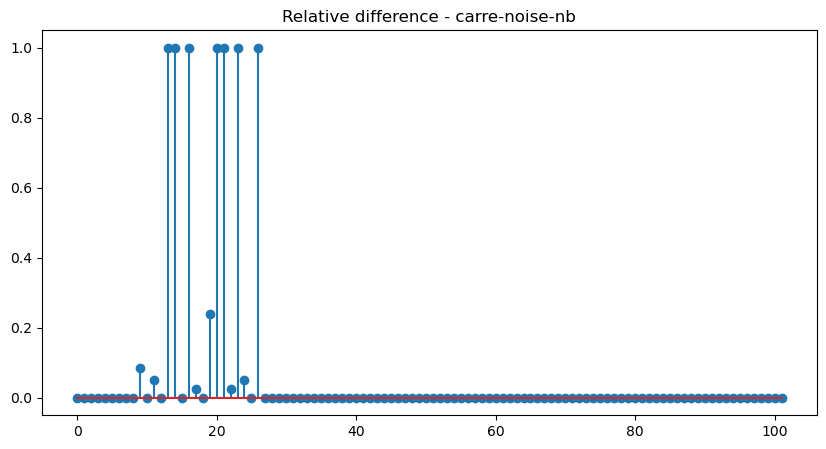

In [28]:
fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresSet[5],
        featuresSet[5],
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresSet[5]),
            np.zeros_like(featuresSet[5]),
        ),
        where=(np.abs(featuresSet[5]) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference - %s" % filenames[ind])

plt.show()

In [29]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1e-2)) :]], sep="\n")

original_firstorder_RootMeanSquared
original_firstorder_Mean
original_firstorder_TotalEnergy
original_firstorder_Energy
original_firstorder_10Percentile
original_firstorder_Minimum
original_firstorder_InterquartileRange
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_Skewness
original_firstorder_Variance
original_firstorder_Kurtosis


## Création d'images synthétiques

### Gradients

#### Hyperparamètres

In [30]:
PATH_RESULTS_GRADIENTS = os.path.join(os.getcwd(), "results", "results_gradients")

#### Déclarations de fonctions

In [31]:
def getGradient2D(width, height):
    return np.tile(np.linspace(0, 1, width), (height, 1))

In [32]:
def Get_values_without_error(im, XX, YY):
    """retourne une image de la taille de XX et YY
    qui vaut im[XX,YY] mais en faisant attention a ce que XX et YY ne debordent
    pas"""
    sh = XX.shape
    defaultval = 0
    if len(im.shape) > 2:  # color image !
        defaultval = np.asarray([0, 0, 0])
        sh = [*sh, im.shape[2]]
    imout = np.zeros(sh)
    (ty, tx) = XX.shape[0:2]
    for k in range(ty):
        for l in range(tx):
            posx = int(XX[k, l] - 0.5)
            posy = int(YY[k, l] - 0.5)
            if posx < 0 or posx >= im.shape[1] or posy < 0 or posy >= im.shape[0]:
                valtmp = defaultval
            else:
                valtmp = im[posy, posx]
            imout[k, l] = valtmp

    return imout

In [33]:
def rotation(im, theta, x0=None, y0=None, ech=0, clip=True):
    """
    %
    % Effectue la transformation geometrique d'une image par
    % une rotation
    %
    % x' = cos(theta)*(x-x0) - sin(theta)*(y-y0) + x0
    % y' = sin(theta)*(x-x0) + cos(theta)*(y-y0) + y0
    %
    % theta : angle de rotation en degres
    % x0, y0 : centre de la rotation (defaut=centre de l'image)
    % ech : plus proche voisin (defaut=0) ou bilineaire (1)
    % clip : format de l'image originale (defaut=True), image complete (False)
    %
    """
    dy = im.shape[0]
    dx = im.shape[1]

    if x0 is None:
        x0 = dx / 2.0
    if y0 is None:
        y0 = dy / 2.0
    v0 = np.asarray([x0, y0]).reshape((2, 1))
    theta = theta / 180 * np.pi
    ct = np.cos(theta)
    st = np.sin(theta)
    matdirect = np.asarray([[ct, -st], [st, ct]])
    if clip == False:
        # ON CALCULE exactement la transformee des positions de l'image
        # on cree un tableau des quatre points extremes
        tabextreme = np.asarray([[0, 0, dx, dx], [0, dy, 0, dy]])
        tabextreme_trans = matdirect @ (tabextreme - v0) + v0
        xmin = np.floor(tabextreme_trans[0].min())
        xmax = np.ceil(tabextreme_trans[0].max())
        ymin = np.floor(tabextreme_trans[1].min())
        ymax = np.ceil(tabextreme_trans[1].max())

    else:
        xmin = 0
        xmax = dx
        ymin = 0
        ymax = dy
    if len(im.shape) > 2:
        shout = (int(ymax - ymin), int(xmax - xmin), im.shape[2])  # image couleur
    else:
        shout = (int(ymax - ymin), int(xmax - xmin))
    dyout = shout[0]
    dxout = shout[1]
    eps = 0.0001
    Xout = np.arange(xmin + 0.5, xmax - 0.5 + eps)
    Xout = np.ones((dyout, 1)) @ Xout.reshape((1, -1))

    Yout = np.arange(ymin + 0.5, ymax - 0.5 + eps)
    Yout = Yout.reshape((-1, 1)) @ np.ones((1, dxout))

    XY = np.concatenate((Xout.reshape((1, -1)), Yout.reshape((1, -1))), axis=0)
    XY = np.linalg.inv(matdirect) @ (XY - v0) + v0
    Xout = XY[0, :].reshape(shout)
    Yout = XY[1, :].reshape(shout)
    if ech == 0:  # plus proche voisin
        out = Get_values_without_error(im, Xout, Yout)
    else:  # bilineaire
        assert ech == 1, "Vous avez choisi un echantillonnage inconnu"
        Y0 = np.floor(Yout - 0.5) + 0.5  # on va au entier+0.5 inferieur
        X0 = np.floor(Xout - 0.5) + 0.5
        Y1 = np.ceil(Yout - 0.5) + 0.5
        X1 = np.ceil(Xout - 0.5) + 0.5
        PoidsX = Xout - X0
        PoidsY = Yout - Y0
        PoidsX[X0 == X1] = 1  # points entiers
        PoidsY[Y0 == Y1] = 1  # points entiers
        I00 = Get_values_without_error(im, X0, Y0)
        I01 = Get_values_without_error(im, X0, Y1)
        I10 = Get_values_without_error(im, X1, Y0)
        I11 = Get_values_without_error(im, X1, Y1)
        out = (
            I00 * (1.0 - PoidsX) * (1.0 - PoidsY)
            + I01 * (1 - PoidsX) * PoidsY
            + I10 * PoidsX * (1 - PoidsY)
            + I11 * PoidsX * PoidsY
        )
    return out

#### Extraction de caractéristiques

In [ ]:
if not os.path.exists(PATH_RESULTS_GRADIENTS):
    os.makedirs(PATH_RESULTS_GRADIENTS)

gradArray = np.pad(getGradient2D(141, 141), pad_width=57, mode="constant")

extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()

for t in np.linspace(start=0, stop=360, num=100, endpoint=False):
    rotGradArray = rotation(gradArray, t, ech=1, clip=True)
    image = sitk.GetImageFromArray(rotGradArray)

    result = extractor.execute(image, carreMask)

    feature = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            feature = np.append(feature, result[key])

    operation = json.dumps(result, cls=NumpyEncoder)

    with open(os.path.join(PATH_RESULTS_GRADIENTS, "%.2f_results.json" % t), "w") as f:
        f.write(operation)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(rotGradArray, cmap="gray")
    axs[0].set_title("%.2f" % t)
    axs[0].axis("off")

    axs[1].imshow(sitk.GetArrayFromImage(carreMask), cmap="gray")
    axs[1].set_title("carre-nb Mask")
    axs[1].axis("off")

    plt.savefig(os.path.join(PATH_RESULTS_GRADIENTS, "%.2f_imMask.png" % t))
    plt.close(fig)

    fig = plt.figure(figsize=(10, 5))

    plt.stem(feature)
    plt.yscale("log")
    plt.title("Features from %.2f" % t)

    plt.savefig(os.path.join(PATH_RESULTS_GRADIENTS, "%.2f_results.png" % t))

    plt.close(fig)

#### Chargement des résultats

In [35]:
results = []
filenames = []

for file in os.listdir(PATH_RESULTS_GRADIENTS):
    filename = os.fsdecode(file)
    if filename.endswith("_results.json"):
        filenames.append(filename[:-13])
        f = open(os.path.join(PATH_RESULTS_GRADIENTS, filename))
        result = json.load(f)
        results.append(result)

featuresSet = []
keysSet = []

for result in results:
    features = np.array([])
    keys = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            features = np.append(features, result[key])
            keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

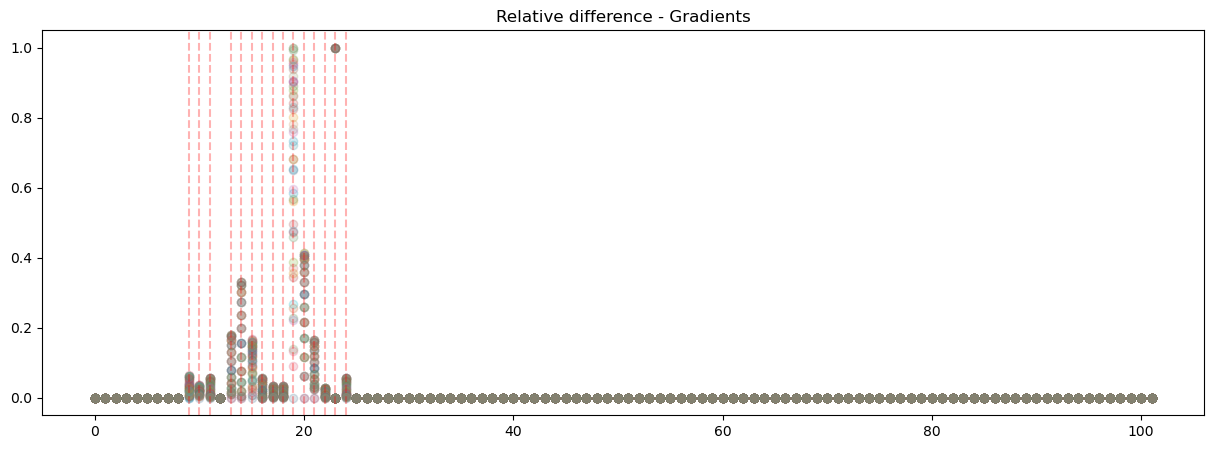

In [36]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresSet[0],
            featuresSet[0],
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresSet[0]),
                np.zeros_like(featuresSet[0]),
            ),
            where=(np.abs(featuresSet[0]) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, label=filenames[i], alpha=0.1)

inds = [9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha=0.3)

plt.title("Relative difference - Gradients")

plt.show()

In [37]:
print(*keysSet[0][inds], sep="\n")

original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy


### Bruits

#### Hyperparamètres

In [38]:
PATH_RESULTS_BRUITS = os.path.join(os.getcwd(), "results", "results_bruits")

#### Déclarations de fonctions

In [39]:
def noise(im, br):
    imt = np.float32(im.copy())
    sh = imt.shape
    bruit = br * np.random.randn(*sh)
    imt += bruit
    imtStd = (imt - np.min(imt)) / (np.max(imt) - np.min(imt))

    return imtStd

#### Extraction de caractéristiques

In [ ]:
if not os.path.exists(PATH_RESULTS_BRUITS):
    os.makedirs(PATH_RESULTS_BRUITS)

extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()

for br in np.linspace(start=0.1, stop=0.5, num=100):
    noisyCarreArray = noise(carreArray, br)
    image = sitk.GetImageFromArray(noisyCarreArray)

    result = extractor.execute(image, carreMask)

    feature = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            feature = np.append(feature, result[key])

    operation = json.dumps(result, cls=NumpyEncoder)

    with open(os.path.join(PATH_RESULTS_BRUITS, "%.3f_results.json" % br), "w") as f:
        f.write(operation)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(noisyCarreArray, cmap="gray")
    axs[0].set_title("%.3f" % br)
    axs[0].axis("off")

    axs[1].imshow(sitk.GetArrayFromImage(carreMask), cmap="gray")
    axs[1].set_title("carre-nb Mask")
    axs[1].axis("off")

    plt.savefig(os.path.join(PATH_RESULTS_BRUITS, "%.3f_imMask.png" % br))
    plt.close(fig)

    fig = plt.figure(figsize=(10, 5))

    plt.stem(feature)
    plt.yscale("log")
    plt.title("Features from %.3f" % br)

    plt.savefig(os.path.join(PATH_RESULTS_BRUITS, "%.3f_results.png" % br))

    plt.close(fig)

#### Chargement des résultats

In [41]:
results = []
filenames = []

for file in os.listdir(PATH_RESULTS_BRUITS):
    filename = os.fsdecode(file)
    if filename.endswith("_results.json"):
        filenames.append(filename[:-13])
        f = open(os.path.join(PATH_RESULTS_BRUITS, filename))
        result = json.load(f)
        results.append(result)

featuresSet = []
keysSet = []

for result in results:
    features = np.array([])
    keys = np.array([])

    for key, value in six.iteritems(result):
        if key.startswith("original_"):
            features = np.append(features, result[key])
            keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

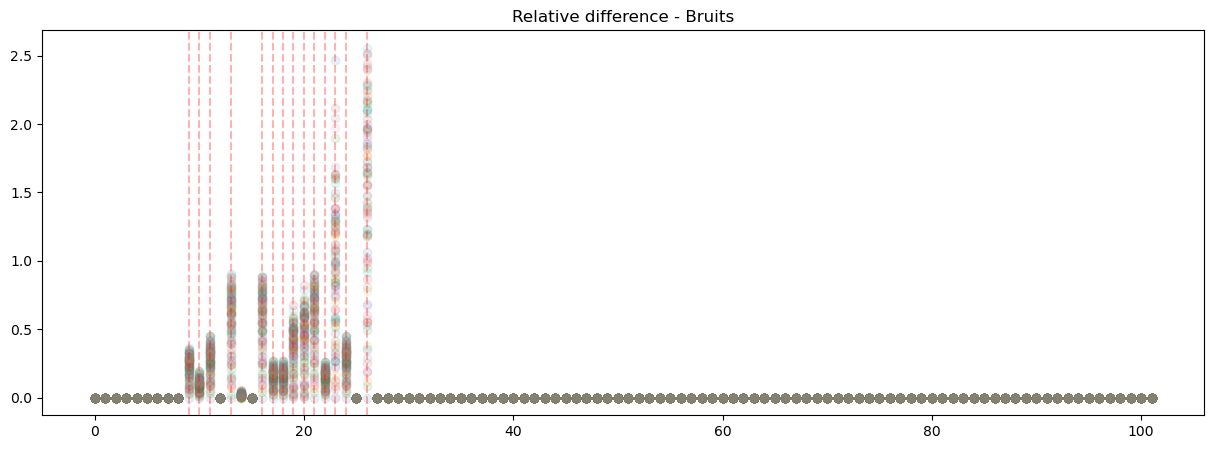

In [42]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresSet[0],
            featuresSet[0],
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresSet[0]),
                np.zeros_like(featuresSet[0]),
            ),
            where=(np.abs(featuresSet[0]) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

inds = [9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha=0.3)

plt.title("Relative difference - Bruits")

plt.show()

In [43]:
print(*keysSet[0][inds], sep="\n")

original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_InterquartileRange
original_firstorder_MeanAbsoluteDeviation
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Range
original_firstorder_RobustMeanAbsoluteDeviation
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_TotalEnergy
original_firstorder_Variance


## Analyse approfondie des caractéristiques texturelles

Dans cette partie, nous examinerons une analyse plus approfondie des caractéristiques de texture à l'aide des outils Pyradiomics. Nous utiliserons les classes de caractéristiques présentées telles que : GLCM, GLRLM et GLSZM. Comme image de test, nous prendrons l'IRM cérébrale brain1 de l'ensemble de cas de test Pyradiomics (contient deux fichiers : brain1_image.nrrd et brain1_label.nrrd, disponibles sur l'annuaire `données_médicales`).

### Importations

In [44]:
from __future__ import print_function

import collections
import radiomics
from radiomics import glcm, imageoperations, glrlm, glszm

### L'obtention du cas de test Brain1

In [45]:
imageName, maskName = radiomics.getTestCase("brain1")

if imageName is None or maskName is None:
    raise Exception("Error getting testcase!")

In [46]:
image = sitk.ReadImage(imageName)
mask = sitk.ReadImage(maskName)

### Prétraiter l'image

In [47]:
settings = {}
settings["binWidth"] = 25
settings["resampledPixelSpacing"] = None
settings["interpolator"] = "sitkBSpline"
settings["verbose"] = True

In [48]:
interpolator = settings.get("interpolator")
resampledPixelSpacing = settings.get("resampledPixelSpacing")
if interpolator is not None and resampledPixelSpacing is not None:
    image, mask = imageoperations.resampleImage(image, mask, **settings)

In [49]:
bb, correctedMask = imageoperations.checkMask(image, mask, label=1)
if correctedMask is not None:
    mask = correctedMask
croppedImage, croppedMask = imageoperations.cropToTumorMask(image, mask, bb)

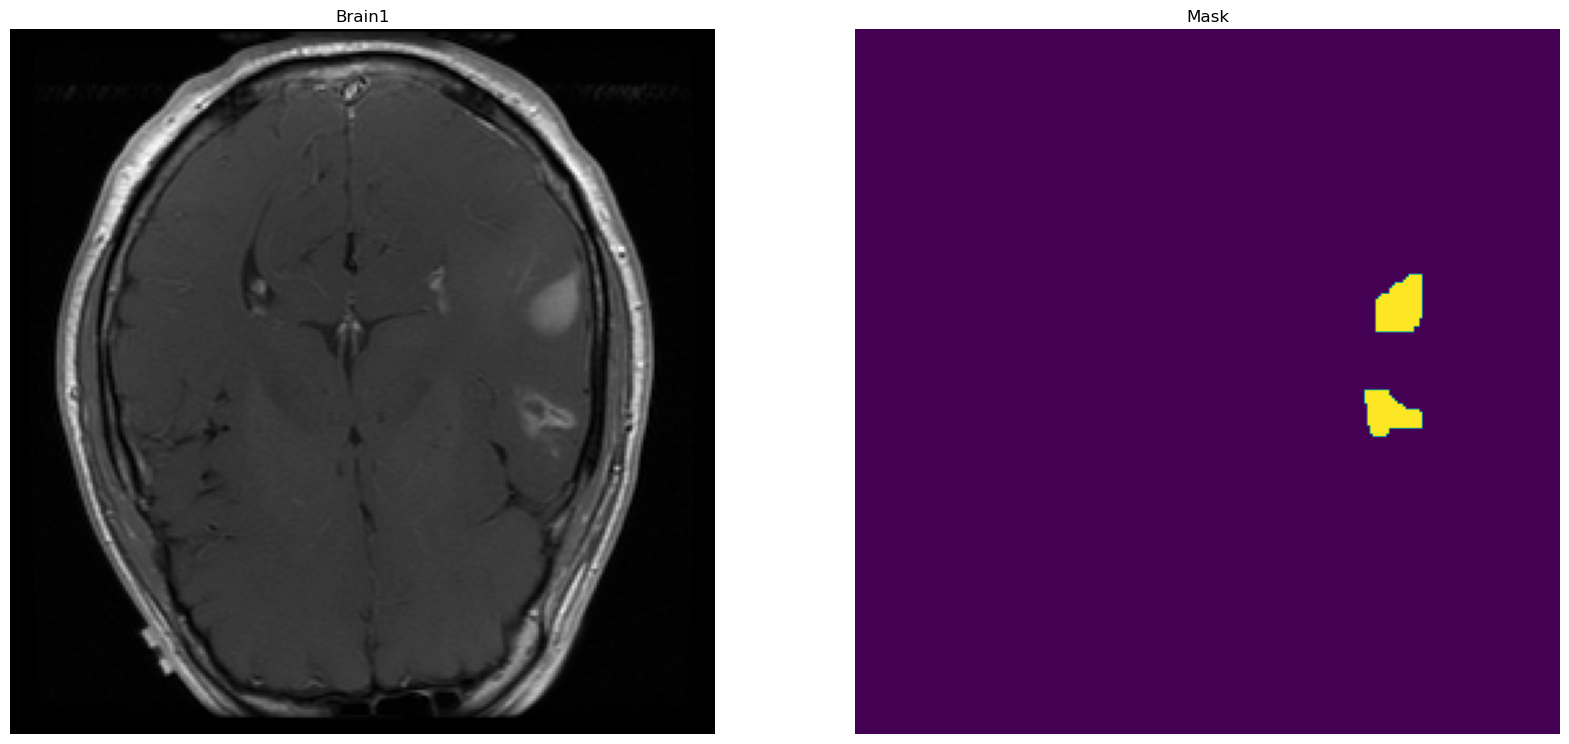

In [50]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(sitk.GetArrayFromImage(image)[12, :, :], cmap="gray")
plt.axis("off")
plt.title("Brain1")
plt.subplot(1, 2, 2)
plt.imshow(sitk.GetArrayFromImage(mask)[12, :, :])
plt.axis("off")
plt.title("Mask")

plt.show()

#### Déclarations de fonctions

In [51]:
def noise(im, br):
    imt = np.float32(im.copy())
    sh = imt.shape
    bruit = br * np.random.randn(*sh)
    imt += bruit
    imtStd = (imt - np.min(imt)) / (np.max(imt) - np.min(imt))

    return imtStd

### Extraction de caractéristiques GLCM

In [52]:
glcmFeatures = glcm.RadiomicsGLCM(croppedImage, croppedMask, **settings)

glcmFeatures.enableAllFeatures()

In [53]:
print(
    "Extraction de caractéristiques GLCM...",
)
result = glcmFeatures.execute()
print("fait")


print("Caractéristiques GLCM extraites: ")

featuresImOrigin = np.array([])
keysImOrigin = np.array([])

for key, val in six.iteritems(result):
    print("  ", key, ":", val)
    featuresImOrigin = np.append(featuresImOrigin, val)
    keysImOrigin = np.append(keysImOrigin, key)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Extraction de caractéristiques GLCM...
fait
Caractéristiques GLCM extraites: 
   Autocorrelation : 289.5436994017259
   ClusterProminence : 27995.937591943148
   ClusterShade : 19.605083427286676
   ClusterTendency : 108.73139325453903
   Contrast : 47.492125114429776
   Correlation : 0.3917522006696661
   DifferenceAverage : 5.284468789866316
   DifferenceEntropy : 3.74406097806642
   DifferenceVariance : 16.65563705027098
   Id : 0.28722572382985156
   Idm : 0.20022255640475703
   Idmn : 0.961402169623227
   Idn : 0.8726052157397169
   Imc1 : -0.09438938808738298
   Imc2 : 0.6942249020670357
   InverseVariance : 0.19881884197093194
   JointAverage : 16.55380772442751
   JointEnergy : 0.002893149242988865
   JointEntropy : 8.799696270248813
   MCC : 0.4990404679585557
   MaximumProbability : 0.007352392266290182
   SumAverage : 33.10761544885502
   SumEntropy : 5.354241321485615
   SumSquares : 39.05587959224222


#### Extraction des caractéristiques GLCM pour les images bruyantes

In [ ]:
featuresSet = []
keysSet = []

for br in np.linspace(start=0.1, stop=0.5, num=100):
    imageArray = sitk.GetArrayFromImage(image)

    noisyImageArray = noise(imageArray, br)
    noisyImage = sitk.GetImageFromArray(noisyImageArray)

    croppedImageNoisy, croppedMask = imageoperations.cropToTumorMask(
        noisyImage, mask, bb
    )

    glcmFeaturesNoisy = glcm.RadiomicsGLCM(croppedImageNoisy, croppedMask, **settings)
    glcmFeaturesNoisy.enableAllFeatures()

    result = glcmFeaturesNoisy.execute()

    features = np.array([])
    keys = np.array([])

    for key, val in six.iteritems(result):
        features = np.append(features, val)
        keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

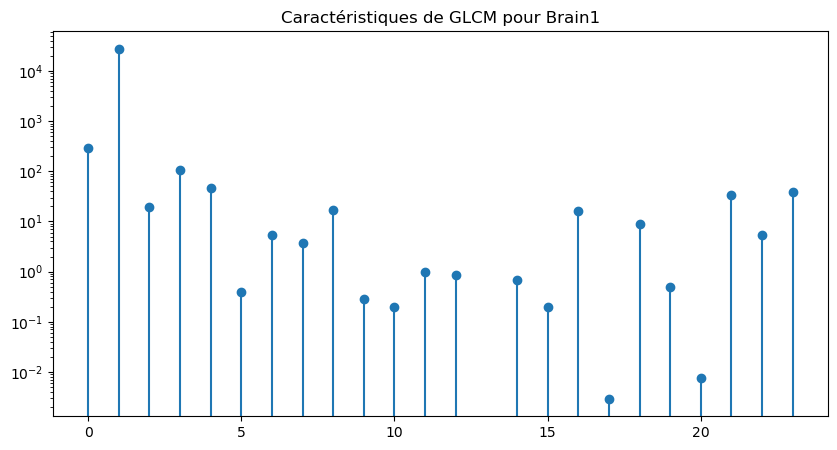

In [55]:
fig = plt.figure(figsize=(10, 5))

plt.stem(featuresImOrigin)
plt.yscale("log")
plt.title("Caractéristiques de GLCM pour Brain1")

plt.show()

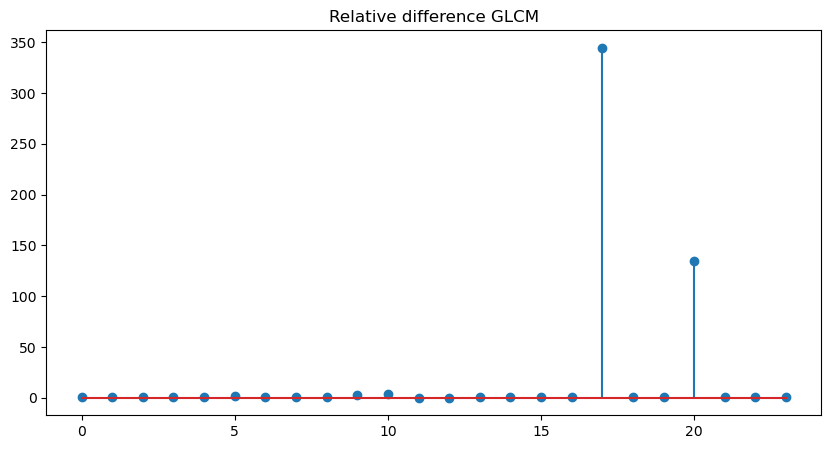

In [56]:
ind = 0

fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresImOrigin,
        featuresImOrigin,
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresImOrigin),
            np.zeros_like(featuresImOrigin),
        ),
        where=(np.abs(featuresImOrigin) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference GLCM")

plt.show()

In [57]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1)) :]], sep="\n")

DifferenceEntropy
MCC
Correlation
Id
Idm
MaximumProbability
JointEnergy


In [58]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 100)) :]], sep="\n")

MaximumProbability
JointEnergy


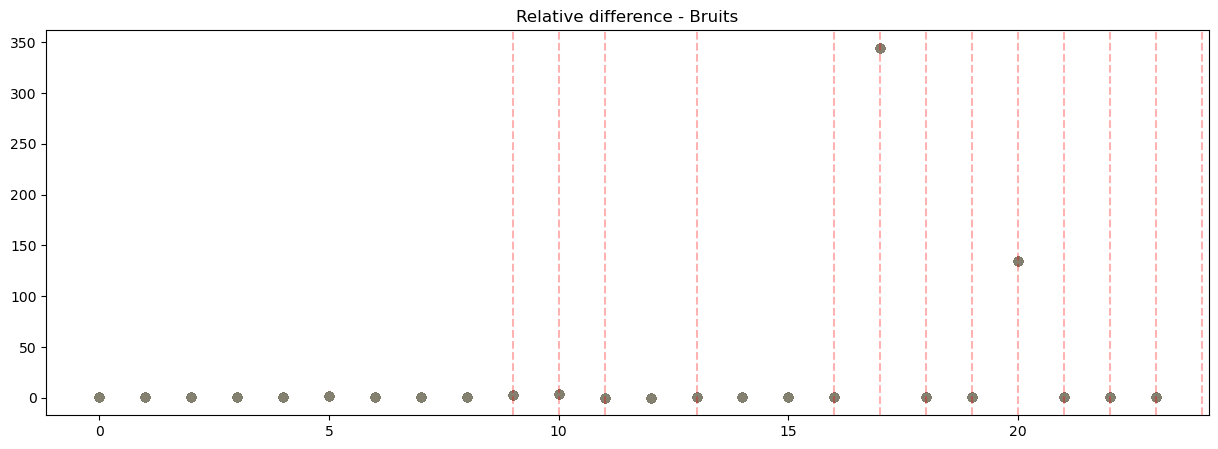

In [59]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

inds = [9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha=0.3)

plt.title("Relative difference - Bruits")

plt.show()

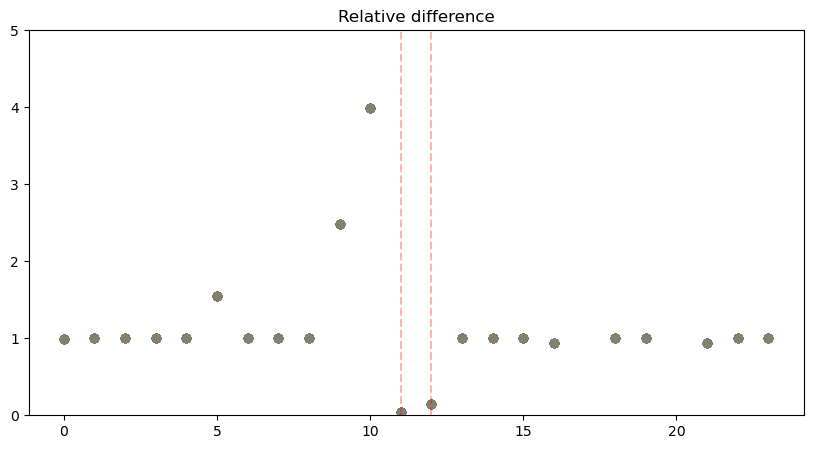

In [60]:
fig = plt.figure(figsize=(10, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

plt.title("Relative difference")
plt.ylim(0, 5)
plt.axvline(x=11, color="red", ls="--", alpha=0.3)
plt.axvline(x=12, color="red", ls="--", alpha=0.3)

plt.show()

In [61]:
print(keysSet[0][11])
print(keysSet[0][12])

Idmn
Idn


### Extraction de caractéristiques GLRLM

In [62]:
glrlmFeatures = glrlm.RadiomicsGLRLM(croppedImage, croppedMask, **settings)

glrlmFeatures.enableAllFeatures()

In [63]:
print(
    "Extraction de caractéristiques GLRLM...",
)
result = glrlmFeatures.execute()
print("fait")

print("Caractéristiques GLRLM extraites: ")

featuresImOrigin = np.array([])
keysImOrigin = np.array([])

for key, val in six.iteritems(result):
    print("  ", key, ":", val)
    featuresImOrigin = np.append(featuresImOrigin, val)
    keysImOrigin = np.append(keysImOrigin, key)

Extraction de caractéristiques GLRLM...
fait
Caractéristiques GLRLM extraites: 
   GrayLevelNonUniformity : 175.6351923150419
   GrayLevelNonUniformityNormalized : 0.04514123814981055
   GrayLevelVariance : 39.118151021979244
   HighGrayLevelRunEmphasis : 281.066493908972
   LongRunEmphasis : 1.2268440382584342
   LongRunHighGrayLevelEmphasis : 341.2865790983503
   LongRunLowGrayLevelEmphasis : 0.010601170478748765
   LowGrayLevelRunEmphasis : 0.008600397891661503
   RunEntropy : 4.915038003159503
   RunLengthNonUniformity : 3500.0432315746298
   RunLengthNonUniformityNormalized : 0.8950494659480998
   RunPercentage : 0.9404064632491029
   RunVariance : 0.08479457789590625
   ShortRunEmphasis : 0.9559391731405504
   ShortRunHighGrayLevelEmphasis : 268.9741798411307
   ShortRunLowGrayLevelEmphasis : 0.008229766244155428


#### Extraction des caractéristiques GLRLM pour les images bruyantes

In [64]:
featuresSet = []
keysSet = []

for br in np.linspace(start=0.1, stop=0.5, num=100):
    imageArray = sitk.GetArrayFromImage(image)

    noisyImageArray = noise(imageArray, br)
    noisyImage = sitk.GetImageFromArray(noisyImageArray)

    croppedImageNoisy, croppedMask = imageoperations.cropToTumorMask(
        noisyImage, mask, bb
    )

    glrlmFeaturesNoisy = glrlm.RadiomicsGLRLM(
        croppedImageNoisy, croppedMask, **settings
    )
    glrlmFeaturesNoisy.enableAllFeatures()

    result = glrlmFeaturesNoisy.execute()

    features = np.array([])
    keys = np.array([])

    for key, val in six.iteritems(result):
        features = np.append(features, val)
        keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

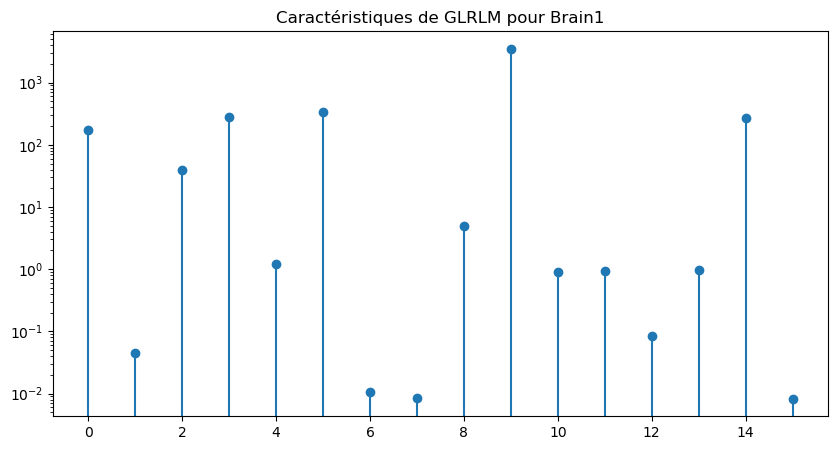

In [65]:
fig = plt.figure(figsize=(10, 5))

plt.stem(featuresImOrigin)
plt.yscale("log")
plt.title("Caractéristiques de GLRLM pour Brain1")

plt.show()

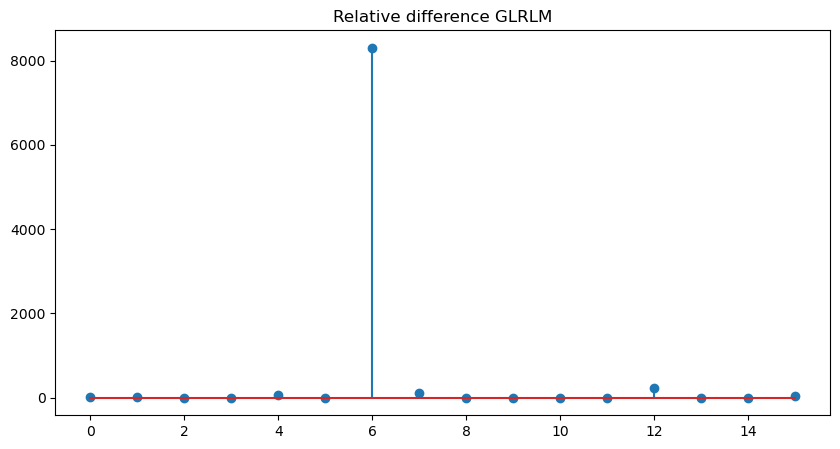

In [66]:
ind = 0

fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresImOrigin,
        featuresImOrigin,
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresImOrigin),
            np.zeros_like(featuresImOrigin),
        ),
        where=(np.abs(featuresImOrigin) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference GLRLM")

plt.show()

In [67]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 8000)) :]], sep="\n")

LongRunLowGrayLevelEmphasis


In [68]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 5)) :]], sep="\n")

GrayLevelNonUniformity
GrayLevelNonUniformityNormalized
ShortRunLowGrayLevelEmphasis
LongRunEmphasis
LowGrayLevelRunEmphasis
RunVariance
LongRunLowGrayLevelEmphasis


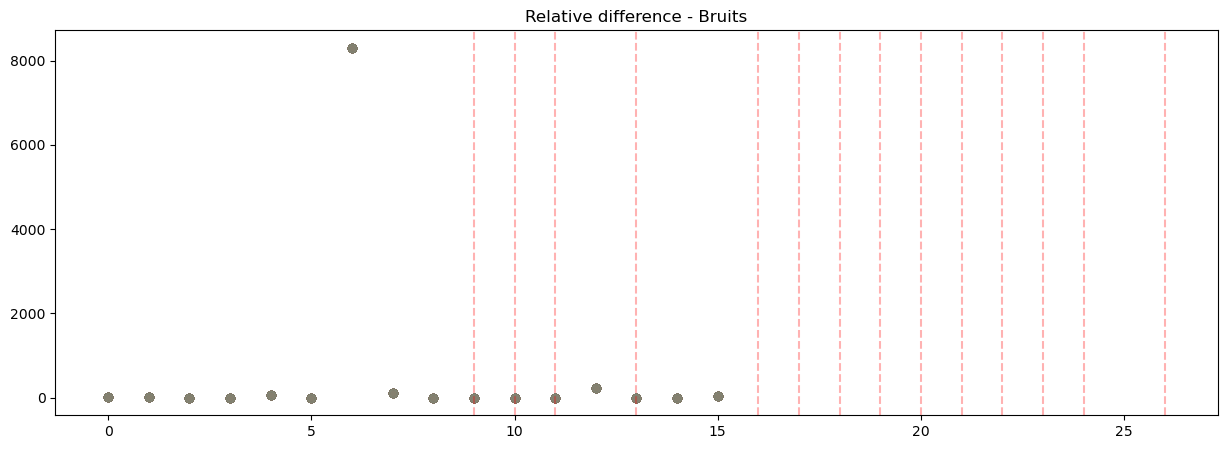

In [69]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

inds = [9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha=0.3)

plt.title("Relative difference - Bruits")

plt.show()

### Extraction de caractéristiques GLSZM

In [70]:
glszmFeatures = glszm.RadiomicsGLSZM(croppedImage, croppedMask, **settings)

glszmFeatures.enableAllFeatures()

In [71]:
print(
    "Extraction de caractéristiques GLSZM...",
)
result = glszmFeatures.execute()
print("fait")

print("Caractéristiques GLSZM extraites: ")

featuresImOrigin = np.array([])
keysImOrigin = np.array([])

for key, val in six.iteritems(result):
    print("  ", key, ":", val)
    featuresImOrigin = np.append(featuresImOrigin, val)
    keysImOrigin = np.append(keysImOrigin, key)

Extraction de caractéristiques GLSZM...
fait
Caractéristiques GLSZM extraites: 
   GrayLevelNonUniformity : 82.38716577540107
   GrayLevelNonUniformityNormalized : 0.044057307901283996
   GrayLevelVariance : 40.60313992393263
   HighGrayLevelZoneEmphasis : 288.6235294117647
   LargeAreaEmphasis : 13.615508021390374
   LargeAreaHighGrayLevelEmphasis : 3514.7614973262034
   LargeAreaLowGrayLevelEmphasis : 0.12723841553344326
   LowGrayLevelZoneEmphasis : 0.009100942027706215
   SizeZoneNonUniformity : 747.5967914438503
   SizeZoneNonUniformityNormalized : 0.3997843804512568
   SmallAreaEmphasis : 0.6564478999587141
   SmallAreaHighGrayLevelEmphasis : 193.438051925864
   SmallAreaLowGrayLevelEmphasis : 0.006416982055097711
   ZoneEntropy : 6.5082149861981895
   ZonePercentage : 0.4520183708000967
   ZoneVariance : 8.721239097486347


#### Extraction des caractéristiques GLSZM pour les images bruyantes

In [72]:
featuresSet = []
keysSet = []

for br in np.linspace(start=0.1, stop=0.5, num=100):
    imageArray = sitk.GetArrayFromImage(image)

    noisyImageArray = noise(imageArray, br)
    noisyImage = sitk.GetImageFromArray(noisyImageArray)

    croppedImageNoisy, croppedMask = imageoperations.cropToTumorMask(
        noisyImage, mask, bb
    )

    glszmFeaturesNoisy = glszm.RadiomicsGLSZM(
        croppedImageNoisy, croppedMask, **settings
    )
    glszmFeaturesNoisy.enableAllFeatures()

    result = glszmFeaturesNoisy.execute()

    features = np.array([])
    keys = np.array([])

    for key, val in six.iteritems(result):
        features = np.append(features, val)
        keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

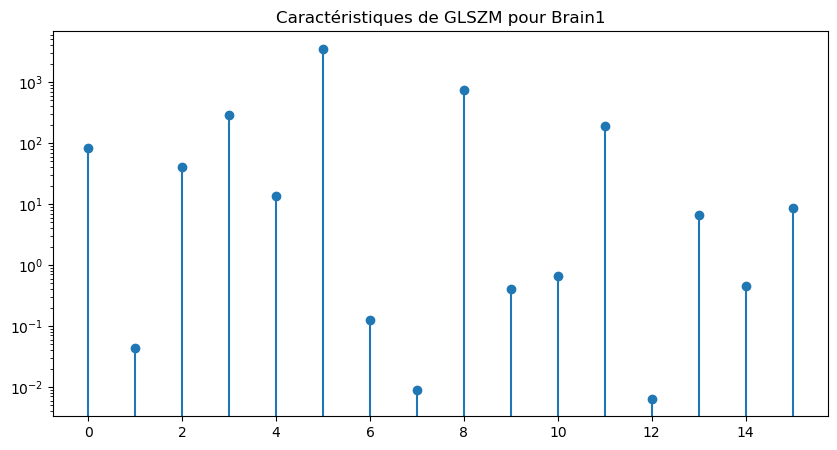

In [73]:
fig = plt.figure(figsize=(10, 5))

plt.stem(featuresImOrigin)
plt.yscale("log")
plt.title("Caractéristiques de GLSZM pour Brain1")

plt.show()

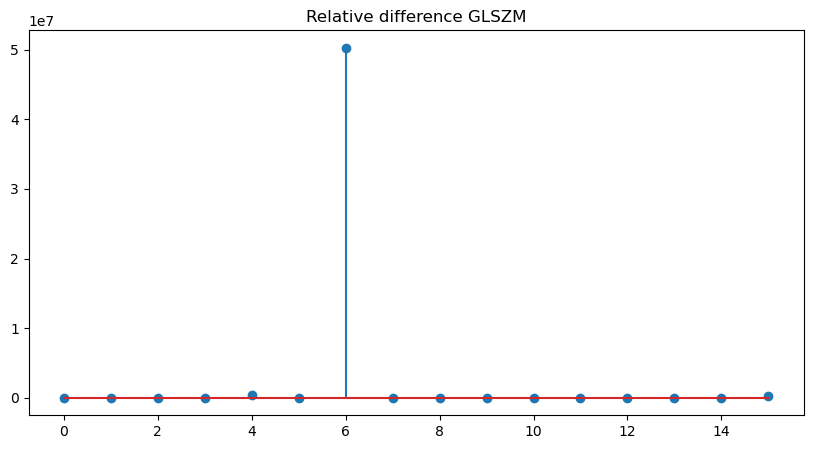

In [74]:
ind = 10

fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresImOrigin,
        featuresImOrigin,
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresImOrigin),
            np.zeros_like(featuresImOrigin),
        ),
        where=(np.abs(featuresImOrigin) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference GLSZM")

plt.show()

In [75]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 10)) :]], sep="\n")

GrayLevelNonUniformityNormalized
LowGrayLevelZoneEmphasis
LargeAreaHighGrayLevelEmphasis
ZoneVariance
LargeAreaEmphasis
LargeAreaLowGrayLevelEmphasis


In [76]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 1000)) :]], sep="\n")

LargeAreaHighGrayLevelEmphasis
ZoneVariance
LargeAreaEmphasis
LargeAreaLowGrayLevelEmphasis


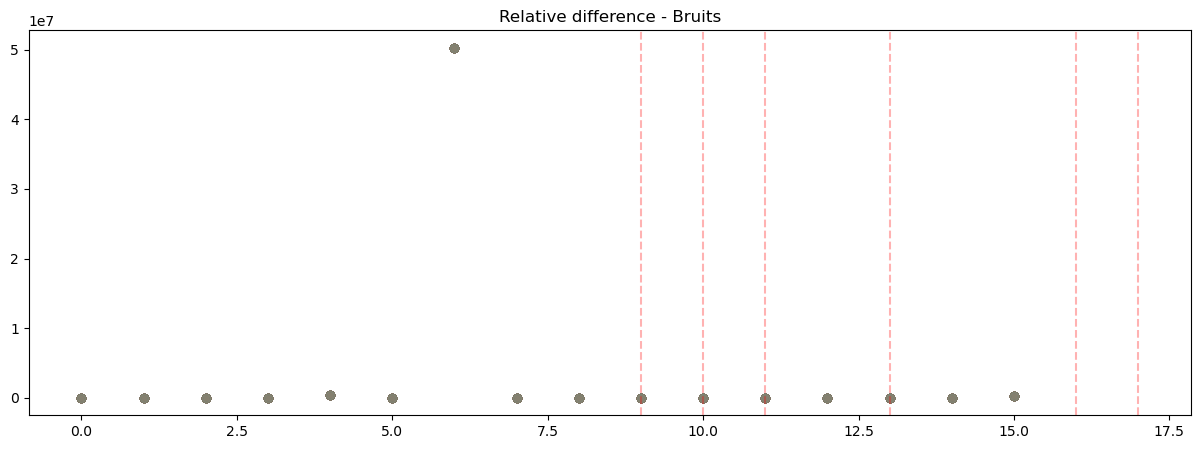

In [77]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

inds = [9, 10, 11, 13, 16, 17]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha=0.3)

plt.title("Relative difference - Bruits")

plt.show()

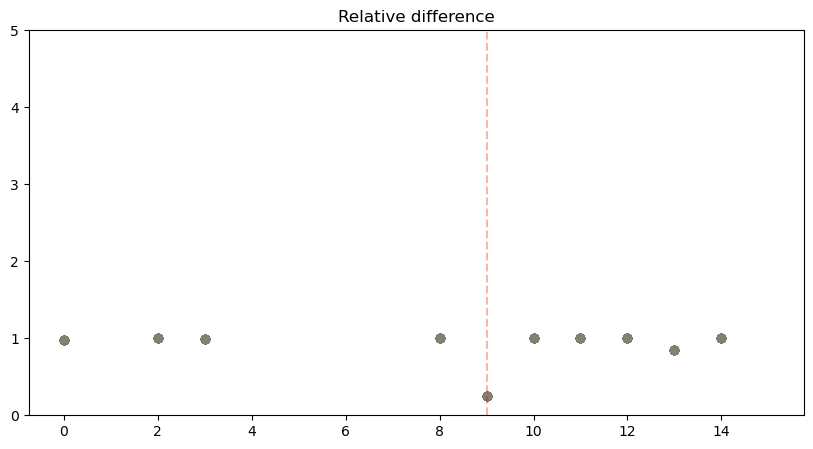

In [78]:
fig = plt.figure(figsize=(10, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

plt.title("Relative difference")
plt.ylim(0, 5)
plt.axvline(x=9, color="red", ls="--", alpha=0.3)

plt.show()

In [79]:
print(keysSet[0][9])

SizeZoneNonUniformityNormalized


## Choix d'un cas d'étude médicale

Comme exemple de données médicales réelles à analyser, un exemple du concours BraTS2018 pour la segmentation des tumeurs cérébrales a été sélectionné (Brats18_TCIA13_633_1_flair.nii disponibles sur l'annuaire `données_médicales`).

### Importations

In [80]:
import nibabel as nib

### Chargement des données

In [81]:
PATH_MEDICALES = os.path.join(os.getcwd(), "images", "données_médicales")

ImageName = os.path.join(PATH_MEDICALES, "Brats18_TCIA13_633_1_flair.nii")

data = nib.load(ImageName)
data = data.get_fdata()

data = np.rot90(data, k=-1, axes=(0, 1))

image = data[:, :, 75]
mask = image > 250

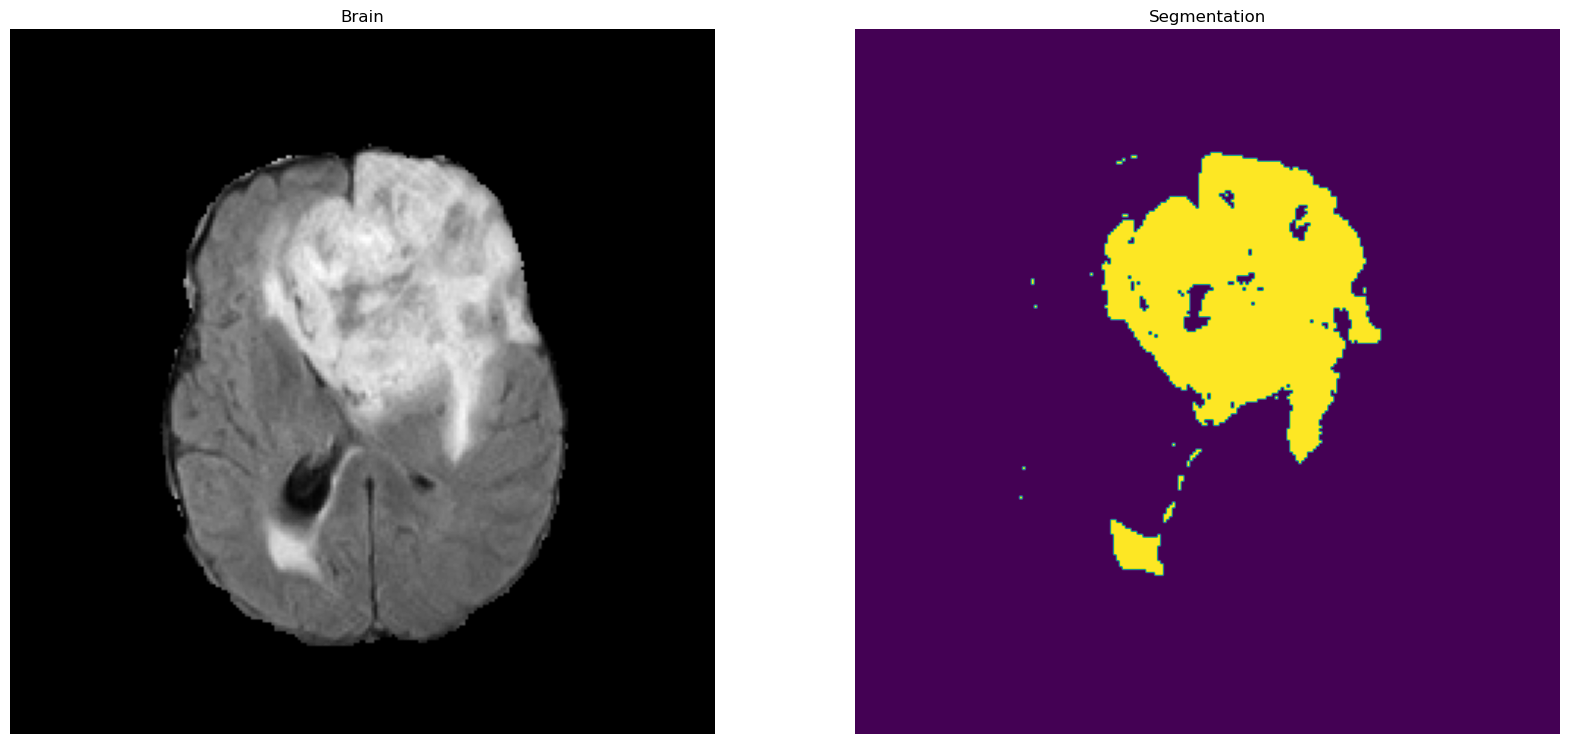

In [82]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Brain")
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis("off")

plt.show()

### Prétraiter l'image

In [83]:
image = sitk.GetImageFromArray(image)
mask = sitk.GetImageFromArray(mask.astype(int))

image = sitk.RescaleIntensity(image, outputMinimum=0, outputMaximum=250)

bb, correctedMask = imageoperations.checkMask(image, mask, label=1)
if correctedMask is not None:
    mask = correctedMask
croppedImage, croppedMask = imageoperations.cropToTumorMask(image, mask, bb)

### Extraction de caractéristiques GLCM

In [84]:
glcmFeatures = glcm.RadiomicsGLCM(croppedImage, croppedMask, **settings)

glcmFeatures.enableAllFeatures()

In [85]:
print(
    "Extraction de caractéristiques GLCM...",
)
result = glcmFeatures.execute()
print("fait")

print("Caractéristiques GLCM extraites: ")

featuresImOrigin = np.array([])
keysImOrigin = np.array([])

for key, val in six.iteritems(result):
    print("  ", key, ":", val)
    featuresImOrigin = np.append(featuresImOrigin, val)
    keysImOrigin = np.append(keysImOrigin, key)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Extraction de caractéristiques GLCM...
fait
Caractéristiques GLCM extraites: 
   Autocorrelation : 10.90286143178125
   ClusterProminence : 14.810148896783193
   ClusterShade : -0.5672499506980472
   ClusterTendency : 2.5305623288372767
   Contrast : 0.3756058016614085
   Correlation : 0.7413926724800473
   DifferenceAverage : 0.35045883263870303
   DifferenceEntropy : 0.9908425426126023
   DifferenceVariance : 0.24991033437329221
   Id : 0.8289061915701661
   Idm : 0.827285280582919
   Idmn : 0.9899546430759985
   Idn : 0.9503808600882447
   Imc1 : -0.3250536385032439
   Imc2 : 0.8233061665665338
   InverseVariance : 0.32897990776746455
   JointAverage : 3.219328692861279
   JointEnergy : 0.1686447824223517
   JointEntropy : 2.9919655104094423
   MCC : 0.7473716125059721
   MaximumProbability : 0.2713072656243598
   SumAverage : 6.438657385722557
   SumEntropy : 2.574002295904843
   SumSquares : 0.7265420326246713


#### Extraction des caractéristiques GLCM pour les images bruyantes

In [ ]:
featuresSet = []
keysSet = []

for br in np.linspace(start=0.1, stop=0.5, num=100):
    imageArray = sitk.GetArrayFromImage(image)

    noisyImageArray = noise(imageArray, br)
    noisyImage = sitk.GetImageFromArray(noisyImageArray)

    croppedImageNoisy, croppedMask = imageoperations.cropToTumorMask(
        noisyImage, mask, bb
    )

    glcmFeaturesNoisy = glcm.RadiomicsGLCM(croppedImageNoisy, croppedMask, **settings)
    glcmFeaturesNoisy.enableAllFeatures()

    result = glcmFeaturesNoisy.execute()

    features = np.array([])
    keys = np.array([])

    for key, val in six.iteritems(result):
        features = np.append(features, val)
        keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

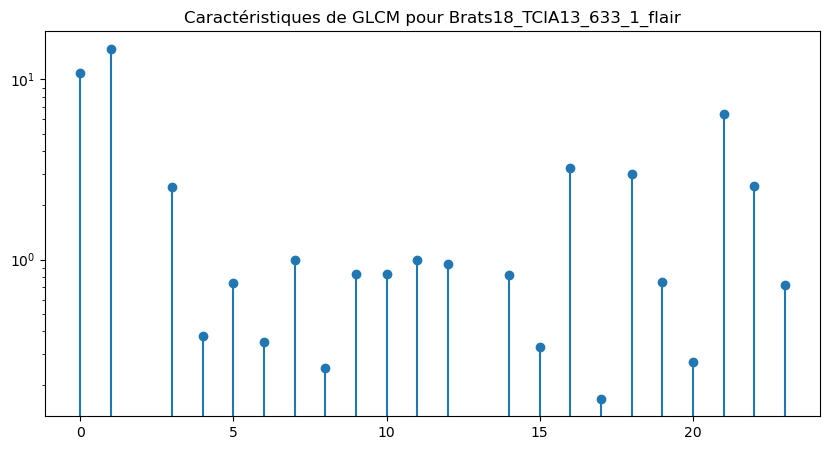

In [87]:
fig = plt.figure(figsize=(10, 5))

plt.stem(featuresImOrigin)
plt.yscale("log")
plt.title("Caractéristiques de GLCM pour Brats18_TCIA13_633_1_flair")

plt.show()

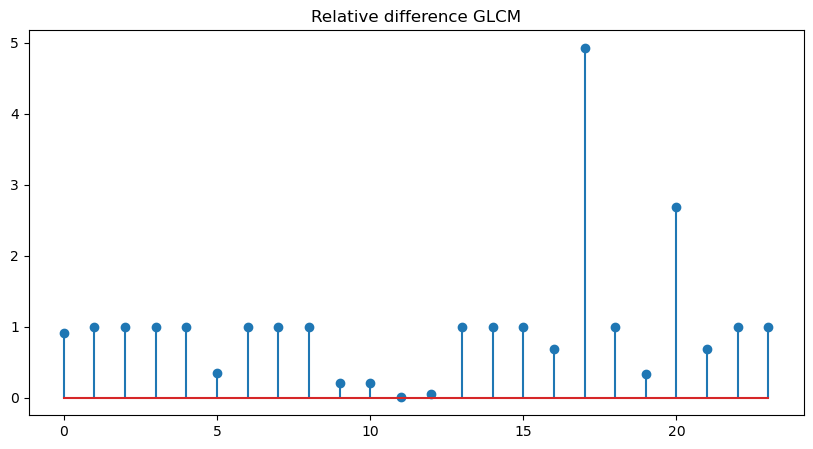

In [88]:
ind = 0

fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresImOrigin,
        featuresImOrigin,
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresImOrigin),
            np.zeros_like(featuresImOrigin),
        ),
        where=(np.abs(featuresImOrigin) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference GLCM")

plt.show()

In [89]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 2)) :]], sep="\n")

MaximumProbability
JointEnergy


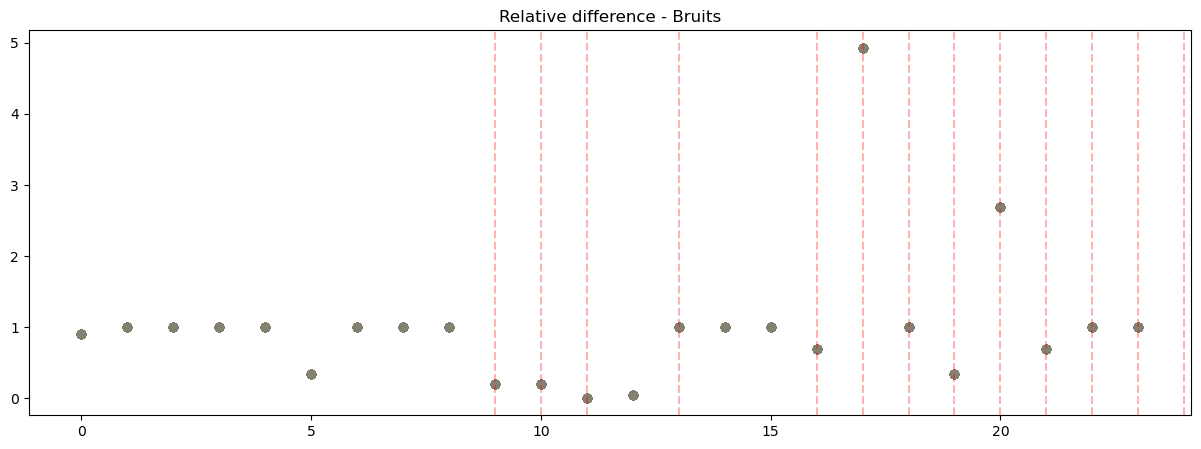

In [90]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

inds = [9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha=0.3)

plt.title("Relative difference - Bruits")

plt.show()

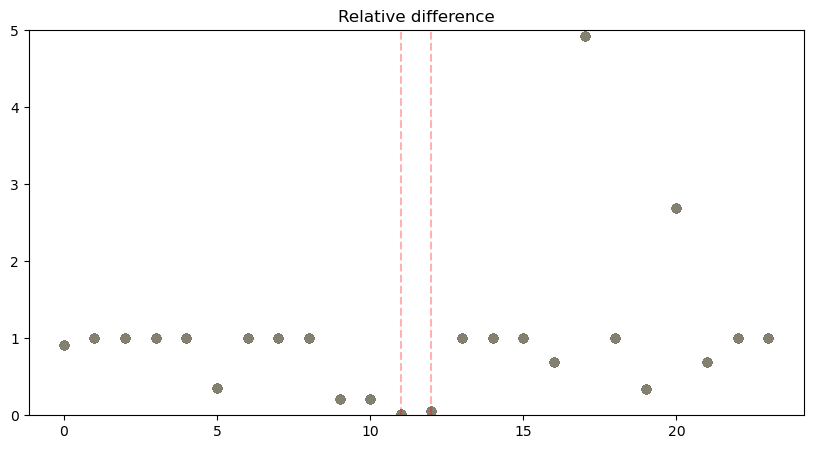

In [91]:
fig = plt.figure(figsize=(10, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

plt.title("Relative difference")
plt.ylim(0, 5)
plt.axvline(x=11, color="red", ls="--", alpha=0.3)
plt.axvline(x=12, color="red", ls="--", alpha=0.3)

plt.show()

In [92]:
print(keysSet[0][11])
print(keysSet[0][12])

print(keysSet[0][9])
print(keysSet[0][10])

Idmn
Idn
Id
Idm


### Extraction de caractéristiques GLRLM

In [93]:
glrlmFeatures = glrlm.RadiomicsGLRLM(croppedImage, croppedMask, **settings)

glrlmFeatures.enableAllFeatures()

In [94]:
print(
    "Extraction de caractéristiques GLRLM...",
)
result = glrlmFeatures.execute()
print("fait")

featuresImOrigin = np.array([])
keysImOrigin = np.array([])

for key, val in six.iteritems(result):
    print("  ", key, ":", val)
    featuresImOrigin = np.append(featuresImOrigin, val)
    keysImOrigin = np.append(keysImOrigin, key)

Extraction de caractéristiques GLRLM...
fait
   GrayLevelNonUniformity : 630.0038686322587
   GrayLevelNonUniformityNormalized : 0.2841053406193961
   GrayLevelVariance : 0.9212469565816063
   HighGrayLevelRunEmphasis : 9.665254121023274
   LongRunEmphasis : 14.660506009854101
   LongRunHighGrayLevelEmphasis : 174.50102221658867
   LongRunLowGrayLevelEmphasis : 1.6473131122881928
   LowGrayLevelRunEmphasis : 0.18007351023320273
   RunEntropy : 4.402438998412194
   RunLengthNonUniformity : 584.9381288942377
   RunLengthNonUniformityNormalized : 0.25838135885387226
   RunPercentage : 0.37095963825154915
   RunVariance : 6.946295911089669
   ShortRunEmphasis : 0.5042146006093099
   ShortRunHighGrayLevelEmphasis : 4.3987348174361305
   ShortRunLowGrayLevelEmphasis : 0.11484619819939573


#### Extraction des caractéristiques GLRLM pour les images bruyantes

In [95]:
featuresSet = []
keysSet = []

for br in np.linspace(start=0.1, stop=0.5, num=100):
    imageArray = sitk.GetArrayFromImage(image)

    noisyImageArray = noise(imageArray, br)
    noisyImage = sitk.GetImageFromArray(noisyImageArray)

    croppedImageNoisy, croppedMask = imageoperations.cropToTumorMask(
        noisyImage, mask, bb
    )

    glrlmFeaturesNoisy = glrlm.RadiomicsGLRLM(
        croppedImageNoisy, croppedMask, **settings
    )
    glrlmFeaturesNoisy.enableAllFeatures()

    result = glrlmFeaturesNoisy.execute()

    features = np.array([])
    keys = np.array([])

    for key, val in six.iteritems(result):
        features = np.append(features, val)
        keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

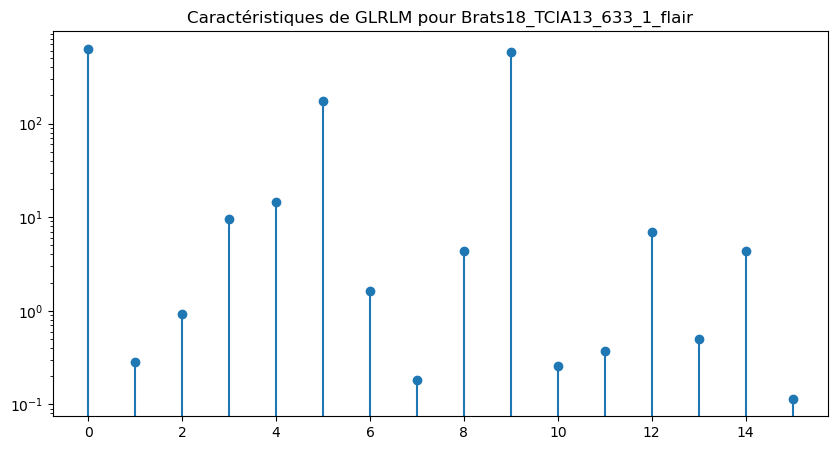

In [96]:
fig = plt.figure(figsize=(10, 5))

plt.stem(featuresImOrigin)
plt.yscale("log")
plt.title("Caractéristiques de GLRLM pour Brats18_TCIA13_633_1_flair")

plt.show()

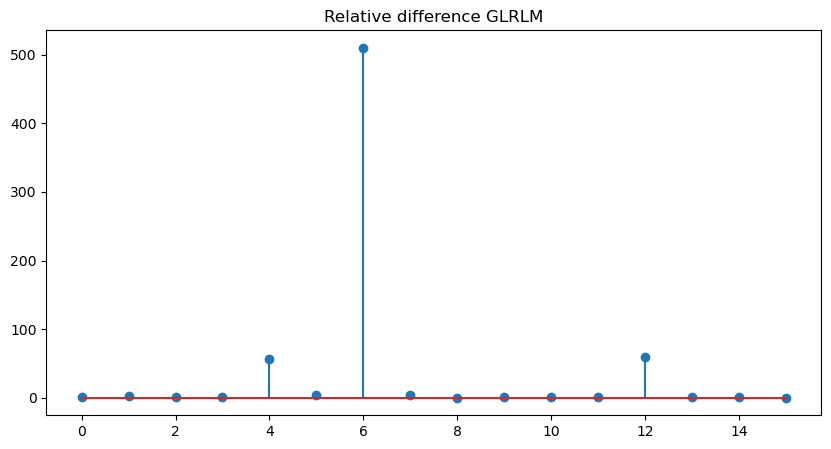

In [97]:
ind = 0

fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresImOrigin,
        featuresImOrigin,
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresImOrigin),
            np.zeros_like(featuresImOrigin),
        ),
        where=(np.abs(featuresImOrigin) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference GLRLM")

plt.show()

In [98]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 50)) :]], sep="\n")

LongRunEmphasis
RunVariance
LongRunLowGrayLevelEmphasis


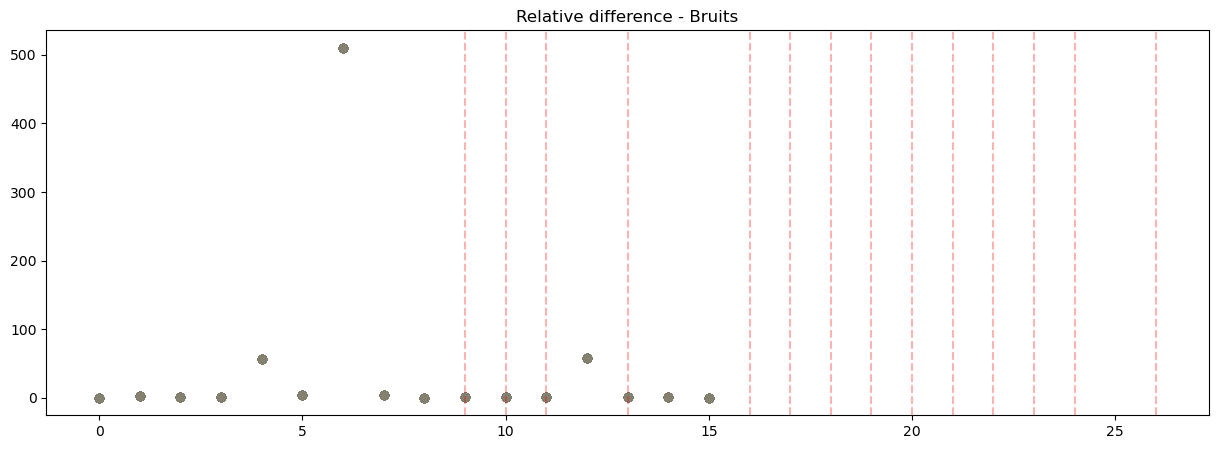

In [99]:
fig = plt.figure(figsize=(15, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

inds = [9, 10, 11, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26]
for xc in inds:
    plt.axvline(x=xc, color="red", ls="--", alpha=0.3)

plt.title("Relative difference - Bruits")

plt.show()

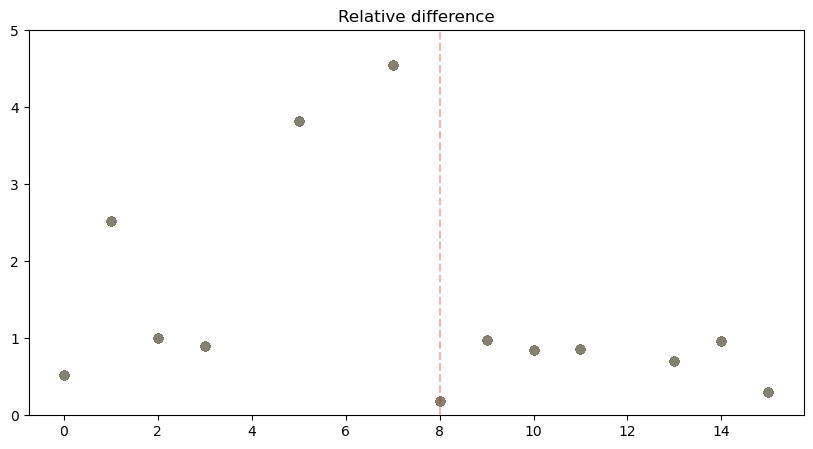

In [100]:
fig = plt.figure(figsize=(10, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

plt.title("Relative difference")
plt.ylim(0, 5)
plt.axvline(x=8, color="red", ls="--", alpha=0.3)

plt.show()

In [101]:
print(keysSet[0][8])

RunEntropy


### Extraction de caractéristiques GLSZM

In [102]:
glszmFeatures = glszm.RadiomicsGLSZM(croppedImage, croppedMask, **settings)

glszmFeatures.enableAllFeatures()

In [103]:
print(
    "Extraction de caractéristiques GLSZM...",
)
result = glszmFeatures.execute()
print("fait")

print("Caractéristiques GLSZM extraites: ")

featuresImOrigin = np.array([])
keysImOrigin = np.array([])

for key, val in six.iteritems(result):
    print("  ", key, ":", val)
    featuresImOrigin = np.append(featuresImOrigin, val)
    keysImOrigin = np.append(keysImOrigin, key)

Extraction de caractéristiques GLSZM...
fait
Caractéristiques GLSZM extraites: 
   GrayLevelNonUniformity : 63.68401486988848
   GrayLevelNonUniformityNormalized : 0.23674354970218764
   GrayLevelVariance : 1.8104780199278616
   HighGrayLevelZoneEmphasis : 7.613382899628252
   LargeAreaEmphasis : 22980.167286245352
   LargeAreaHighGrayLevelEmphasis : 277409.36059479555
   LargeAreaLowGrayLevelEmphasis : 2127.466184427922
   LowGrayLevelZoneEmphasis : 0.4327571251548947
   SizeZoneNonUniformity : 73.53531598513011
   SizeZoneNonUniformityNormalized : 0.2733654869335692
   SmallAreaEmphasis : 0.5352689908391917
   SmallAreaHighGrayLevelEmphasis : 3.479777702010076
   SmallAreaLowGrayLevelEmphasis : 0.30904154052727595
   ZoneEntropy : 4.645693175579849
   ZonePercentage : 0.0450510802210685
   ZoneVariance : 22487.45932201048


#### Extraction des caractéristiques GLSZM pour les images bruyantes

In [104]:
featuresSet = []
keysSet = []

for br in np.linspace(start=0.1, stop=0.5, num=100):
    imageArray = sitk.GetArrayFromImage(image)

    noisyImageArray = noise(imageArray, br)
    noisyImage = sitk.GetImageFromArray(noisyImageArray)

    croppedImageNoisy, croppedMask = imageoperations.cropToTumorMask(
        noisyImage, mask, bb
    )

    glszmFeaturesNoisy = glszm.RadiomicsGLSZM(
        croppedImageNoisy, croppedMask, **settings
    )
    glszmFeaturesNoisy.enableAllFeatures()

    result = glszmFeaturesNoisy.execute()

    features = np.array([])
    keys = np.array([])

    for key, val in six.iteritems(result):
        features = np.append(features, val)
        keys = np.append(keys, key)

    featuresSet.append(features)
    keysSet.append(keys)

#### Comparaison des résultats

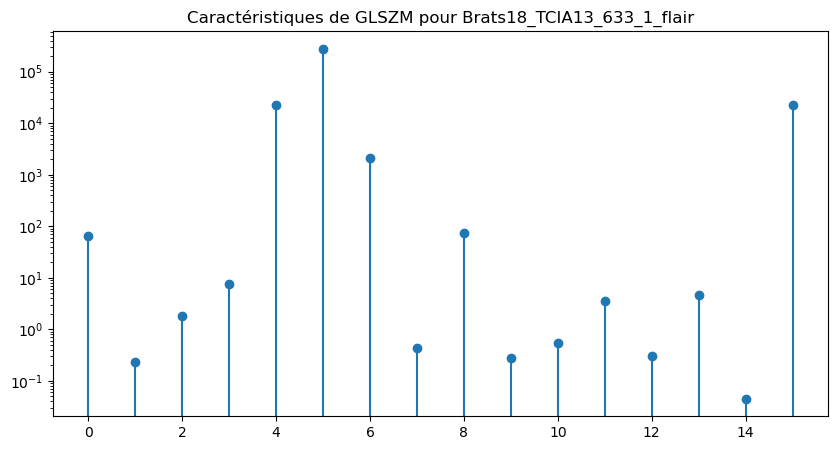

In [105]:
fig = plt.figure(figsize=(10, 5))

plt.stem(featuresImOrigin)
plt.yscale("log")
plt.title("Caractéristiques de GLSZM pour Brats18_TCIA13_633_1_flair")

plt.show()

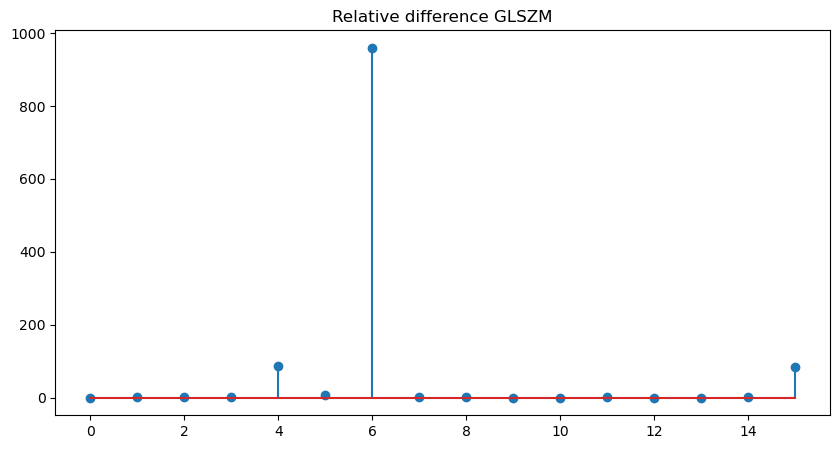

In [106]:
ind = 10

fig = plt.figure(figsize=(10, 5))

norm = np.abs(
    np.divide(
        featuresSet[ind] - featuresImOrigin,
        featuresImOrigin,
        out=np.where(
            np.abs(featuresSet[ind]) > 1e-8,
            np.ones_like(featuresImOrigin),
            np.zeros_like(featuresImOrigin),
        ),
        where=(np.abs(featuresImOrigin) > 1e-8),
    )
)

plt.stem(norm)
plt.title("Relative difference GLSZM")

plt.show()

In [107]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 5)) :]], sep="\n")

LargeAreaHighGrayLevelEmphasis
ZoneVariance
LargeAreaEmphasis
LargeAreaLowGrayLevelEmphasis


In [108]:
print(*keysSet[ind][np.argsort(norm)[-len(np.argwhere(norm > 800)) :]], sep="\n")

LargeAreaLowGrayLevelEmphasis


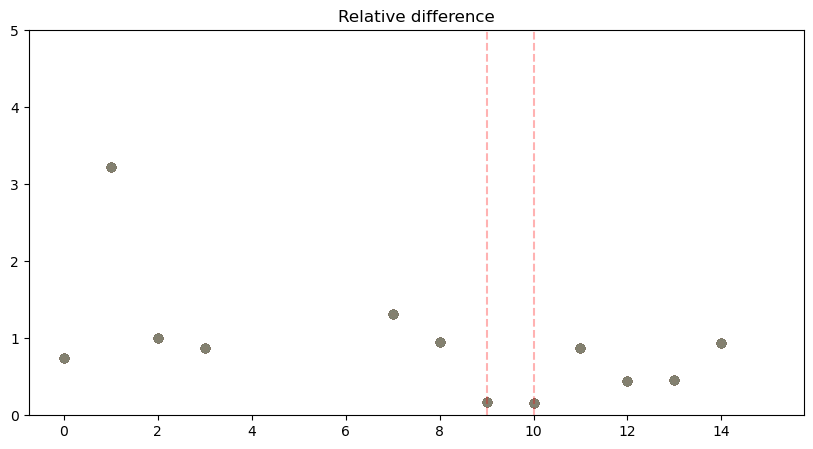

In [109]:
fig = plt.figure(figsize=(10, 5))

for i in range(len(featuresSet)):
    norm = np.abs(
        np.divide(
            featuresSet[i] - featuresImOrigin,
            featuresImOrigin,
            out=np.where(
                np.abs(featuresSet[i]) > 1e-8,
                np.ones_like(featuresImOrigin),
                np.zeros_like(featuresImOrigin),
            ),
            where=(np.abs(featuresImOrigin) > 1e-8),
        )
    )
    plt.scatter(range(0, len(featuresSet[i])), norm, alpha=0.1)

plt.title("Relative difference")
plt.ylim(0, 5)
plt.axvline(x=9, color="red", ls="--", alpha=0.3)
plt.axvline(x=10, color="red", ls="--", alpha=0.3)

plt.show()

In [110]:
print(keysSet[0][9])
print(keysSet[0][10])

SizeZoneNonUniformityNormalized
SmallAreaEmphasis


## Discussion

Sur la base des expériences réalisées sur des images générées avec diverses modifications de l'image carrée, on peut constater que seules les caractéristiques de premier ordre changent, telles que :

- original_firstorder_Mean
- original_firstorder_Median
- original_firstorder_Energy
- original_firstorder_90Percentile
- original_firstorder_10Percentile
- original_firstorder_Minimum
- original_firstorder_RootMeanSquared
- original_firstorder_Maximum
- original_firstorder_TotalEnergy.

Sur la base des expériences réalisées pour le cas de test Brain1 de la bibliothèque Pyrodiomics, nous pouvons déjà remarquer un changement dans les caractéristiques de la texture. Les caractéristiques suivantes sont les plus instables à l'ajout de bruit :

- MaximumProbability(GLCM);
- JointEnergy(GLCM);
- LongRunLowGrayLevelEmphasis(GLRLM);
- LargeAreaHighGrayLevelEmphasis(GLSZM). 

La différence relative entre les valeurs de ces caractéristiques de l'image originale et de l'image additionnée de bruit gaussien est significative, dépassant parfois plusieurs milliers. Dans le même temps, si l'on compare deux images bruitées : la différence relative entre les valeurs de ces caractéristiques reste insignifiante.

Les caractéristiques suivantes se sont révélées stables à l’ajout de bruit : 

- Idmn(GLCM);
- Idn(GLCM);
- SizeZoneNonUniformityNormalized(GLSZM). 

Pour le cas réel du concours Brats18, les caractéristiques suivantes ne changent pas non plus après l'ajout de bruit : Id(GLCM), Idm(GLCM) et SmallAreaEmphasis(GLSZM).

Des questions restent ouvertes sur l'influence des différents filtres sur les caractéristiques caractérisant la texture, et sur l'application de ces connaissances dans la segmentation des images médicales. Ces questions restent pour des recherches futures.

## Conclusion

Ainsi, les travaux suivants ont été réalisés :

- la documentation de la bibliothèque Pyradiomique a été étudiée ;
- de la littérature supplémentaire a été étudiée ;
- le package de tests de pyradiomique a été testé
- des images synthétiques ont été générées et testées
- des données médicales réelles ont été testées.


Sur la base de la recherche, nous pouvons conclure que lorsque vous travaillez avec des images contenant des textures, vous devez être prudent lorsque vous utilisez divers filtres et modifications, car cela peut grandement affecter la valeur de certaines caractéristiques et conduire à de fausses conclusions lors d'une analyse plus approfondie.

Dans d'autres cas, il faut faire attention aux caractéristiques de premier ordre, qui changent même dans des images simples avec des modifications mineures.

Pour l'analyse d'images et de données médicales, en particulier, la bibliothèque Pyrodiomics est adaptée, qui permet de standardiser le travail avec les données médicales et fournit une large gamme d'outils pour l'analyse d'images. Le seul inconvénient identifié au cours des travaux est la documentation obsolète de la bibliothèque Pyrradiomics et le manque de guides simples pour travailler avec elle.

## Bibliographie

<!-- https://www.mybib.com/tools/ama-citation-generator -->

[1] van Griethuysen JJ, Fedorov A, Parmar C, et al. Computational Radiomics System to Decode the Radiographic Phenotype. Cancer research. 2017;77(21):e104-e107. doi:https://doi.org/10.1158/0008-5472.CAN-17-0339

‌[2] Duron L, Balvay D, Vande Perre S, et al. Gray-level discretization impacts reproducible MRI radiomics texture features. Fan Y, ed. PLOS ONE. 2019;14(3):e0213459. doi:https://doi.org/10.1371/journal.pone.0213459

[3] Decoux A, Duron L, Habert P, et al. Comparative performances of machine learning algorithms in radiomics and impacting factors. Scientific Reports. 2023;13(1). doi:https://doi.org/10.1038/s41598-023-39738-7

[4] Vande Perre S, Duron L, Milon A, Nougaret S, Fournier L, Thomassin-Naggara I. Radiomique : mode d’emploi. Méthodologie et exemples d’application en imagerie de la femme. Imagerie de la Femme. 2019;29(1):25-33. doi:https://doi.org/10.1016/j.femme.2019.01.003
